# Задание 1. Знакомство с данными и EDA
В этом домашнем задании мы будем работать с данными по рынку недвижимости в Нью-Йорке. Перед тем как проводить дата-анализ наших данных, необходимо провести разведочный анализ данных.

In [1]:
# Импортируем библиотеки и данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Загружаем данные и отсекаем по цене <= 20 000 000 миллионам долларов
ny_housing = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/NY-House-Dataset.csv")
ny_housing = ny_housing[ny_housing['PRICE'] <= 200000000]
ny_housing.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [3]:
ny_housing.tail()

BROKERTITLE            TYPE    PRICE  \
4796                            Brokered by COMPASS  Co-op for sale   599000   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale   245000   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale  1275000   
4799        Brokered by E Realty International Corp  Condo for sale   598125   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale   349000   

      BEDS  BATH  PROPERTYSQFT                    ADDRESS  \
4796     1   1.0   2184.207862       222 E 80th St Apt 3A   
4797     1   1.0   2184.207862        97-40 62 Dr Unit Lg   
4798     1   1.0   2184.207862  427 W 21st St Unit Garden   
4799     2   1.0    655.000000   91-23 Corona Ave Unit 4G   
4800     1   1.0    750.000000    460 Neptune Ave Apt 14O   

                    STATE                                 MAIN_ADDRESS  \
4796  Manhattan, NY 10075      222 E 80th St Apt 3AManhattan, NY 10075   
4797  Rego Park, NY 11374       97-40 62 Dr Unit LgRego Park, NY 11374   
4798   New York, NY 10011  427 W 21st St Unit GardenNew York, NY 10011   
4799   Elmhurst, NY 11373   91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800   Brooklyn, NY 11224    460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York  New York County   
4799                    New York    Queens County           Queens   
4800                    New York     Kings County         Brooklyn   

       STREET_NAME         LONG_NAME  \
4796     Manhattan               222   
4797        Queens        62nd Drive   
4798      New York  West 21st Street   
4799      Flushing             91-23   
4800  Coney Island               460   

                                   FORMATTED_ADDRESS   LATITUDE  LONGITUDE  
4796      222 E 80th St #3a, New York, NY 10075, USA  40.774350 -73.955879  
4797         97-40 62nd Dr, Rego Park, NY 11374, USA  40.732538 -73.860152  
4798          427 W 21st St, New York, NY 10011, USA  40.745882 -74.003398  
4799  91-23 Corona Ave. #4b, Flushing, NY 11373, USA  40.742770 -73.872752  
4800   460 Neptune Ave #14a, Brooklyn, NY 11224, USA  40.579147 -73.970949

Мы вижим что данные корректно подгрузились и с ними можно начинать дальнейшую работу, для начала посморим наши харакеристики и найдем их описание, с этого по моему мнению всегда нужно начинать

In [4]:
ny_housing.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

* BROKERTITLE: Название брокера
* TYPE: Тип дома
* PRICE: Цена дома
* СПАЛЬНИ: Количество спален
* BATH: Количество ванных комнат
* PROPERTYSQFT: Площадь объекта недвижимости
* ADDRESS: Полный адрес дома
* STATE: Штат дома
* MAIN_ADDRESS: Информация об основном адресе
* ADMINISTRATIVE_AREA_LEVEL_2: Информация об административном районе уровня 2
* LOCALITY: Информация о населенном пункте
* SUBLOCALITY: Информация о населенном пункте
* STREET_NAME: Название улицы
* LONG_NAME: Длинное имя
* FORMATTED_ADDRESS: Форматированный адрес
* LATITUDE: Координата широты дома
* LONGITUDE: Координата долготы дома

Отлично все фичи понятные и на первый взгляд имеют значение для формирования таргетного признака, я думаю что в данном случае это PRICE, без вариантов

In [5]:
# Посмотрим на наличие пропуков, визуализация это хорошо, но способ ниже тоже очень хорош, потому
# что он выдает числа
ny_housing.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

<Axes: >

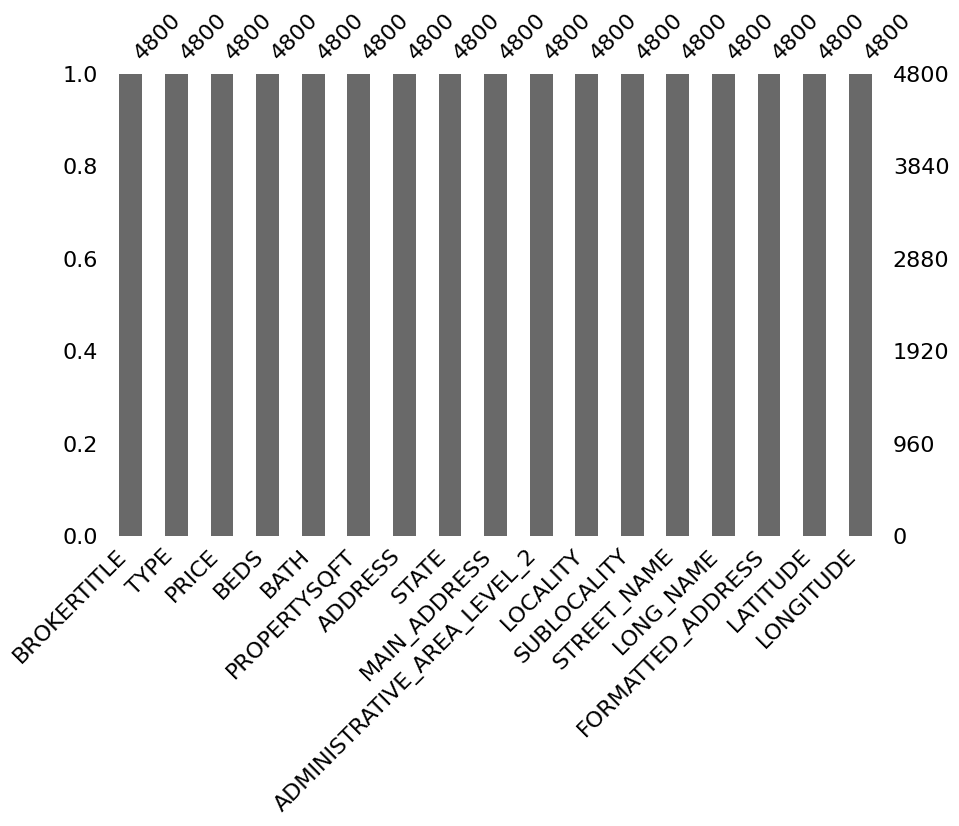

In [6]:
# ну и на картинке это посмотреть тоже будет приятно
msno.bar(ny_housing, figsize=(10, 6))

In [7]:
# посмотрим на типы данных
ny_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4800 non-null   object 
 1   TYPE                         4800 non-null   object 
 2   PRICE                        4800 non-null   int64  
 3   BEDS                         4800 non-null   int64  
 4   BATH                         4800 non-null   float64
 5   PROPERTYSQFT                 4800 non-null   float64
 6   ADDRESS                      4800 non-null   object 
 7   STATE                        4800 non-null   object 
 8   MAIN_ADDRESS                 4800 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4800 non-null   object 
 10  LOCALITY                     4800 non-null   object 
 11  SUBLOCALITY                  4800 non-null   object 
 12  STREET_NAME                  4800 non-null   object 
 13  LONG_NAME              

Итак у нас 4 числовых колонки, 2 отвечают за географическое положение, остальные категориальные, это нас вполне устраивает

In [8]:
# Форматирование строк для вывода без "e" берем 6 что бы не испортить геоданные
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [9]:
# посмотрим основные статистики по числовым признакам
ny_housing.describe()

PRICE        BEDS        BATH  PROPERTYSQFT    LATITUDE  \
count      4800.000000 4800.000000 4800.000000   4800.000000 4800.000000   
mean    1910038.773750    3.356042    2.373105   2182.579572   40.714268   
std     4929166.909833    2.602054    1.946461   2374.709381    0.087639   
min        2494.000000    1.000000    0.000000    230.000000   40.499546   
25%      499000.000000    2.000000    1.000000   1200.000000   40.639512   
50%      825000.000000    3.000000    2.000000   2184.207862   40.726756   
75%     1495000.000000    4.000000    3.000000   2184.207862   40.771924   
max   195000000.000000   50.000000   50.000000  65535.000000   40.912729   

        LONGITUDE  
count 4800.000000  
mean   -73.941542  
std      0.101011  
min    -74.253033  
25%    -73.987143  
50%    -73.949182  
75%    -73.870638  
max    -73.702450

Итак по первому же столбцу PRICE мы видим что есть цена в 195 млн долларов при средней 1.9, стандартное отклоннение почти 5 миллионов! это сильно смещает наше распределение, и думаю мы это еще увидим. Минимальная же цена недвижимости установлена в размере 2494 долларов, что тоже кажется черезчур дешево. По количеству спален в среднем у нас в объектах по 3 спальни и 2 ванные комнаты. По колонке площадь недвижимости тоже есть странности - стандартное отклонение практически равно среднему, это свидетельствует о наличии очень больших аппартаментов, мы разберемся со всем этим когда будем работать с выбросами

In [10]:
# всегда полезно посмотреть статистики и по категориальным признакам
ny_housing.describe(include='object')

BROKERTITLE            TYPE          ADDRESS  \
count                  4800            4800             4800   
unique                 1035              13             4582   
top     Brokered by COMPASS  Co-op for sale  2619 Shore Pkwy   
freq                    456            1450                3   

                     STATE                       MAIN_ADDRESS  \
count                 4800                               4800   
unique                 307                               4582   
top     Brooklyn, NY 11235  2619 Shore PkwyBrooklyn, NY 11223   
freq                   102                                  3   

       ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY SUBLOCALITY STREET_NAME  \
count                         4800      4800        4800        4800   
unique                          29        11          21         174   
top                  United States  New York    New York   Manhattan   
freq                          2483      2504        1016         979   

       LONG_NAME                                  FORMATTED_ADDRESS  
count       4800                                               4800  
unique      2731                                               4550  
top            2  61-20 Grand Central Pkwy, Forest Hills, NY 113...  
freq          20                                                  4

Что мы тут видим.
* У нас 1035 уникальных брокеров из которых самый популярный Brokered by COMPASS (у него 456 объявлений в наших данных).
* 13 уникальных типов недвижимости, из которых самый популярыный Co-op for sale их 1450.
* а вот дальше интересно - у нас всего 4582 уникальных адресов, а строк 4800 - это значит какие то адреса повторяются, 2619 Shore Pkwy вот этот адрес чаще всех - 3 раза
* Тоже самое мы наюлюдаем по колонкам STATE	и MAIN_ADDRESS это наталкивает нас на мысль о проверке на дубликаты записей
* Отметим так же LOCALITY	и SUBLOCALITY потому что нам с ними работать. Итак 11 уникальных локаций и 21 подлокация (больше всего объектов у нас в New York)
* Самая популярная улица это Manhattan

In [11]:
#Найдем дубликаты
duplicateRows = ny_housing[ny_housing.duplicated ()]

# и проверим сколько их
duplicateRows.shape[0]

214

214 дубликатов! Но стоит проверить еще. Посмотрим первую строку в наборе дубликатов и потом посмотрим на нее в основном датасете

In [12]:
duplicateRows.head(1)

BROKERTITLE            TYPE    PRICE  \
81  Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale  1650000   

    BEDS     BATH  PROPERTYSQFT                ADDRESS               STATE  \
81     2 2.000000   1065.000000  200 E 94th St Apt 414  New York, NY 10128   

                               MAIN_ADDRESS ADMINISTRATIVE_AREA_LEVEL_2  \
81  200 E 94th St Apt 414New York, NY 10128                    New York   

           LOCALITY SUBLOCALITY STREET_NAME LONG_NAME  \
81  New York County    New York   Manhattan       200   

                                 FORMATTED_ADDRESS  LATITUDE  LONGITUDE  
81  200 E 94th St APT 414, New York, NY 10128, USA 40.783355 -73.949998

In [13]:
ny_housing[ny_housing['ADDRESS'] == '200 E 94th St Apt 414']

BROKERTITLE            TYPE    PRICE  \
80  Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale  1650000   
81  Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale  1650000   

    BEDS     BATH  PROPERTYSQFT                ADDRESS               STATE  \
80     2 2.000000   1065.000000  200 E 94th St Apt 414  New York, NY 10128   
81     2 2.000000   1065.000000  200 E 94th St Apt 414  New York, NY 10128   

                               MAIN_ADDRESS ADMINISTRATIVE_AREA_LEVEL_2  \
80  200 E 94th St Apt 414New York, NY 10128                    New York   
81  200 E 94th St Apt 414New York, NY 10128                    New York   

           LOCALITY SUBLOCALITY STREET_NAME LONG_NAME  \
80  New York County    New York   Manhattan       200   
81  New York County    New York   Manhattan       200   

                                 FORMATTED_ADDRESS  LATITUDE  LONGITUDE  
80  200 E 94th St APT 414, New York, NY 10128, USA 40.783355 -73.949998  
81  200 E 94th St APT 414, New York, NY 10128, USA 40.783355 -73.949998

Действительно, все корректно - в данных действительно есть дубликаты, возможно просто объявления выставлялись несколько раз, но у нас в данных нет колонки время объявления, а для регрессии такие данные будут мешать их стоит удалить, хотя если наша догдка правдива потом стоит поизучать эти дубликаты на предмет того какие объекты выставлялись несколько раз - естественно с целью понять почему

In [14]:
# удаляем дубликаты
df = ny_housing.drop_duplicates().reset_index()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        4586 non-null   int64  
 1   BROKERTITLE                  4586 non-null   object 
 2   TYPE                         4586 non-null   object 
 3   PRICE                        4586 non-null   int64  
 4   BEDS                         4586 non-null   int64  
 5   BATH                         4586 non-null   float64
 6   PROPERTYSQFT                 4586 non-null   float64
 7   ADDRESS                      4586 non-null   object 
 8   STATE                        4586 non-null   object 
 9   MAIN_ADDRESS                 4586 non-null   object 
 10  ADMINISTRATIVE_AREA_LEVEL_2  4586 non-null   object 
 11  LOCALITY                     4586 non-null   object 
 12  SUBLOCALITY                  4586 non-null   object 
 13  STREET_NAME       

Вот теперь наш набор данных готов к дальнейшим заданиям

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>],
       [<Axes: title={'center': 'BATH'}>,
        <Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>, <Axes: >, <Axes: >]],
      dtype=object)

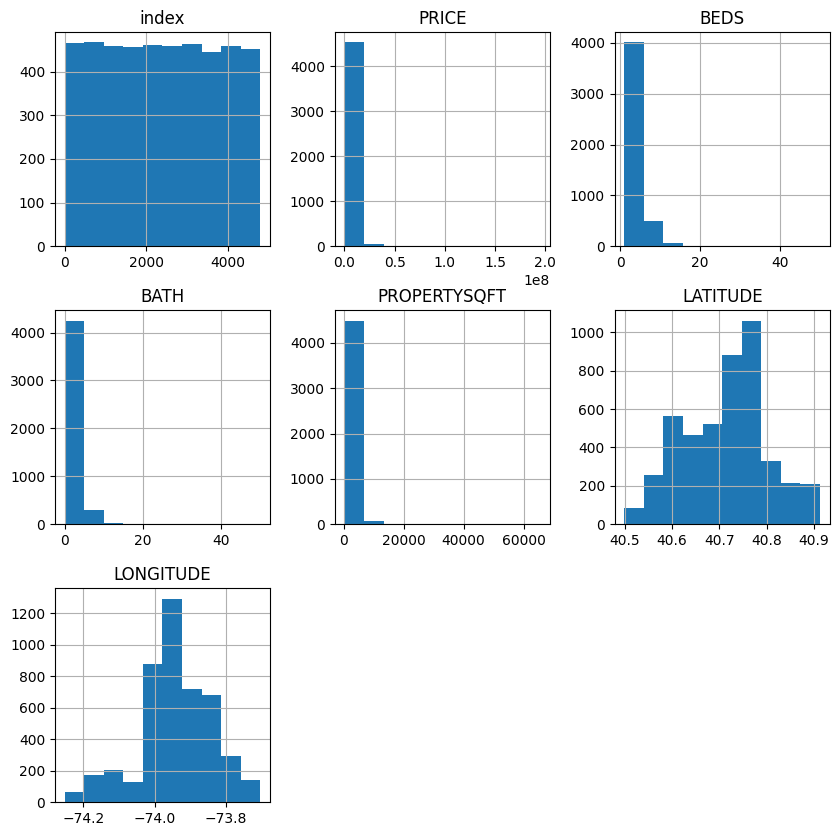

In [16]:
# перед тем как приступить к выполнению заданий построим гистограммы всех столбцов, используя pandas,
# очень часто первые инсайты приходят именно с нее, а строится она очень просто)
df.hist(figsize=(10, 10))

Если честно особо не информативно, но пойдем дальше

# Задание 1

## Задание 1.1 

Построить разные графики и сделать 6 выводов
На этом этапе нам нужно выявить с помощью визуализаций разные паттерны и зависимости, распределение значений внутри переменных.

Создайте 6 визуализаций разных видов. Можно использовать графики из галерей Matplotlib или Seaborn. Полученные графики отобразите и сохраните в отдельные переменные.
Каждый график должен иметь все стандартные аттрибуты - подписи осей, название и другие необходимые детали.
NB: Визуализация должна иметь смысл и нести новую информацию.



Сначала построим графики, а выводы будем делать похже в соответствующем пункте задания

### 1й График - корреляционная карта признаков

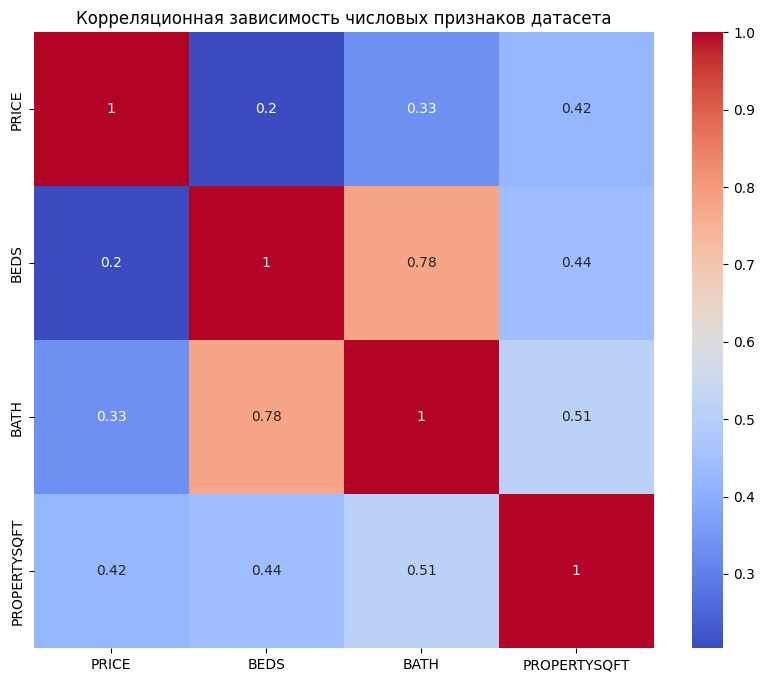

In [17]:
# У нас 4 числовых параметра, посмотрим на корреляцию между ними и попробуем сделать выводы
corr = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].corr()

# Use seaborn to create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная зависимость числовых признаков датасета')
plt.show()

Корреляция числовый признаков на мой взгляд must have в исследовании датасета, во первых мы понимаем какие признаки связаны зависимостью между собой и "главной переменной" (в нашем случае это цена). Признаки, связанные с ценой мы оставляем оязательно, а вот признаки которые коррелируются между собой (не с ценой) могут испортить нам прогноз и с ними нужно работать. В нашем случае все довольно просто. Лишь 1 признак имеет хоть какую то ощутимую корреляцию с ценой на недвижимость это площадь (что довольно логично), хотя значение 0.42, возможно после устранения выбрасов это исправится. А вот 2 признака количество ванных комнат и количество комнат сильно коррелируют между собой (0.78), что тоже логично, но вредно для регрессии. Нам стоит понять какой признак более значим, а от второго можно избавиться, он лишь оттянет на себя вес. Но это потом, а сейчас про себя отметим признаки: площадь, ванные, комнаты - к ним стоит присмотреться  

### 2й график - Анализ распределения цены

Построим гистрограмма распределения цены

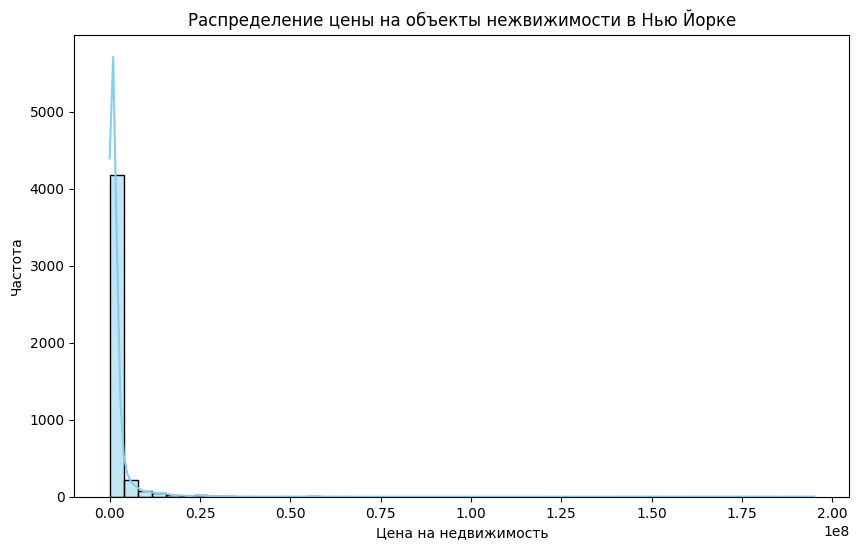

In [18]:
# распределение 1 признака это гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=50, kde=True, color='skyblue')
plt.title('Распределение цены на объекты нежвижимости в Нью Йорке')
plt.xlabel('Цена на недвижимость')
plt.ylabel('Частота')
plt.show()

Мы видим что распределение сильно скошено вправо, это значит у нас есть значения цены почти в 20 000 000 долларов это очень, и очевидно что таких значений очень немного, они портят распределение и для того что бы узнать где расположена самая попуряная цена стоит отсечь значения, начнем допустим с 10 000 000

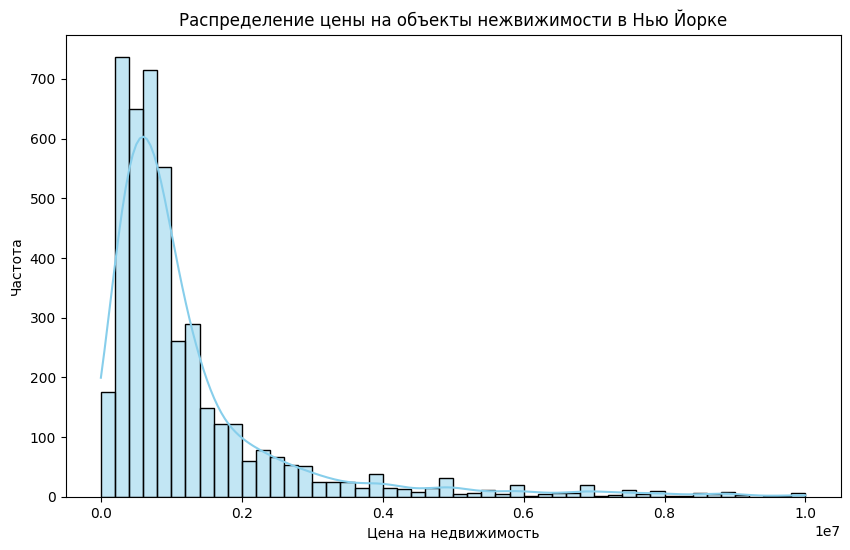

In [19]:
# тот же самый график но с отсечкой по цене менее 10 000 000
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'][df['PRICE'] < 10000000], bins=50, kde=True, color='skyblue')
plt.title('Распределение цены на объекты нежвижимости в Нью Йорке')
plt.xlabel('Цена на недвижимость')
plt.ylabel('Частота')
plt.show()

И вновь мы видим что есть немного очень больших цен, а основные показатели состедоточены от 0 до 2 000 000, что же сделаем еще одно отсечение в 2 000 000.

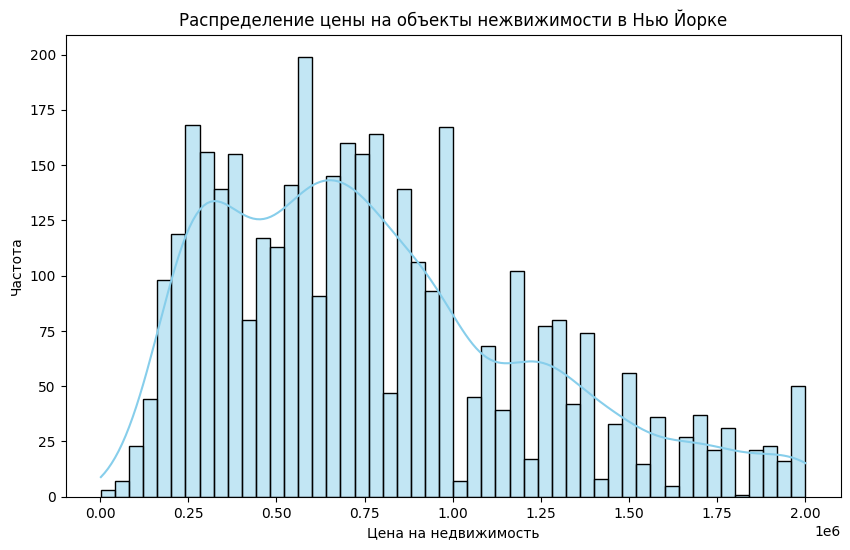

In [20]:
# тот же самый график но с отсечкой по цене менее 10 000 000
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'][df['PRICE'] < 2000000], bins=50, kde=True, color='skyblue')
plt.title('Распределение цены на объекты нежвижимости в Нью Йорке')
plt.xlabel('Цена на недвижимость')
plt.ylabel('Частота')
plt.show()

Вот уже интереснее мы видим что наиболее распространенные (частые) цены располагаеются на отрезке от 250 000 до 1 000 000

### 3й График. Начнем разбираться неравномерным распределением цены и посмотрим как это зависит от района.   

In [21]:
# для начала создадим табличку в которой будет средняя и медианная цена по району
df_locality_info = df.groupby('LOCALITY')['PRICE'].agg(['mean', 'median'])


In [22]:
df_locality_info

mean         median
LOCALITY                                     
Bronx County     338824.947674  279450.000000
Brooklyn        1426166.666667  607000.000000
Flatbush         650000.000000  650000.000000
Kings County     859313.549774  547000.000000
New York        2331324.088972  998000.000000
New York County 2611791.319355 1067000.000000
Queens           517333.333333  453000.000000
Queens County    443988.546642  378500.000000
Richmond County  449264.396552  350000.000000
The Bronx        306000.000000  280000.000000
United States   1327848.324324  880000.000000

В табличке разница бросается в глаза не сразу, но видно что средняя цена почти везде выше чем медианная. Это значит в каждом районе есть дома, которые существенно выше среднего(по медиане). Применим визуализацию, на одном полотне 2 барплота тот где средняя цена будет сильно выступать над медианой - там таких объектов гораздо больше, и так мы увидим разницу

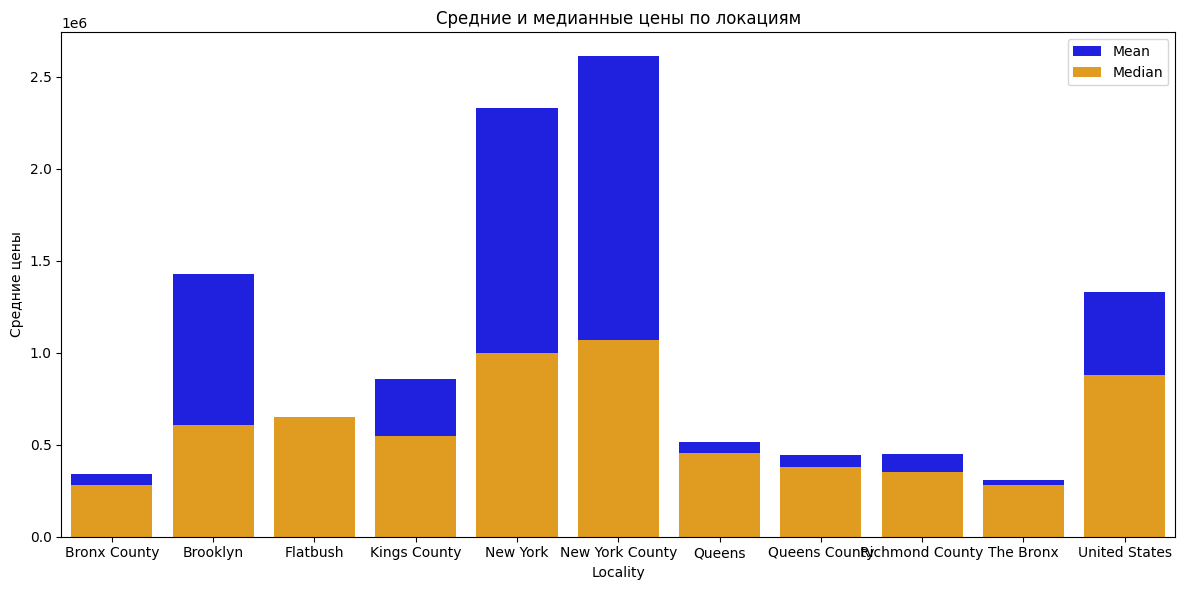

In [23]:
# Размер графика
plt.figure(figsize=(12, 6))

# Создание графика среднего значения
sns.barplot(x='LOCALITY', y='mean', data=df_locality_info, color='blue', label='Mean')

# Создание графика медианы
sns.barplot(x='LOCALITY', y='median', data=df_locality_info, color='orange', label='Median')

# Настройка подписей и легенды
plt.xlabel('Locality')
plt.ylabel('Средние цены')
plt.title('Средние и медианные цены по локациям')
plt.legend()
plt.tight_layout()

# Вывод графика
plt.show()

Итак мы видим что самые дорогие объекты (что по среднему что по медиане в районах New York и New York County). Нас смущает третий по рейтингу район - United States - возможно это следствие ошибки в данных, судя по всему так быть не должно это же США, хотя мы не знаем может и есть такой район. Указанные 2 первых района и Brooklyn имеют самый сильный разброс между медианой и средним - значит там как раз и сосредоточены наши объекты с непомерной и возможно неправильной ценой. Еще сразу обращает на себя вниманеи район Flatbush, там средняя и медиана равны, возможно это район с фиксированными ценами? стоит посмотреть  

In [24]:
# Фильтрация данных по LOCALITY == 'Flatbush'
flatbush_data = df[df['LOCALITY'] == 'Flatbush']

# Вывод уникальных значений в столбце 'PRICE' для Flatbush
print(flatbush_data['PRICE'].unique())

[650000]


И действительно все объекты недвижимости в районе Flatbush стоят одинаково - 650 000 долларов. Интересный факт

### 4й График - подсчета обявлений по типам недвижимости

In [25]:
# Наверное удобнее использовать дадасет и не плодить переменные, но и такой метод тоже нужно освоить
type_of_sale = df['TYPE'].value_counts()
type_of_sale

TYPE
Co-op for sale                1388
House for sale                 965
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

Самый популярный тип недвижимости - Co-op for sale, а вот ниже интереснее - Coming Soon это скорее всего объект который пока не сдан их всего 2, и о чудо есть даже 1 мобильный дом. Интересно что это и сколько он стоит? 

In [26]:
# отфильтруем
df[df['TYPE'] == 'Mobile house for sale']


index                            BROKERTITLE                   TYPE  \
972   1002  Brokered by BLACKWATER ASSOCIATES INC  Mobile house for sale   

       PRICE  BEDS     BATH  PROPERTYSQFT         ADDRESS  \
972  1288000     6 3.000000   2184.207862  31-50 Buell St   

                       STATE                           MAIN_ADDRESS  \
972  East Elmhurst, NY 11369  31-50 Buell StEast Elmhurst, NY 11369   

    ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY    SUBLOCALITY STREET_NAME  \
972               United States  New York  Queens County      Queens   

        LONG_NAME                        FORMATTED_ADDRESS  LATITUDE  \
972  Buell Street  31-50 Buell St, Flushing, NY 11369, USA 40.760908   

     LONGITUDE  
972 -73.861558

Интересно, но ничего не понятно, вроде бы обычная квартира

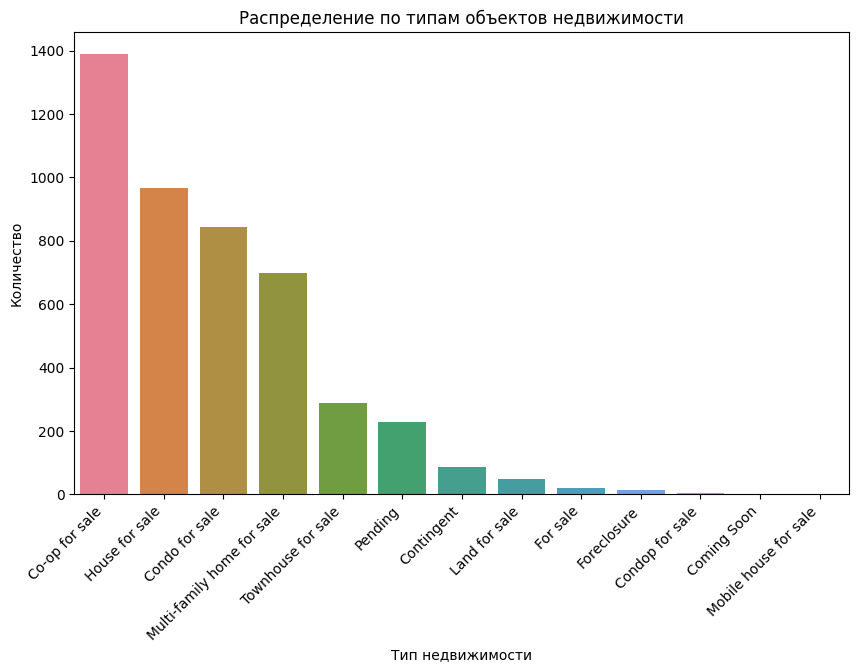

In [27]:
# построим распределение которое мы исследуем на графике
plt.figure(figsize=(10, 6))
sns.barplot(x = type_of_sale.index, y=type_of_sale.values, hue=type_of_sale.index)
#sns.countplot(x='TYPE', data=df, hue='TYPE')
plt.title('Распределение по типам объектов недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.show()

Очень удобно, что мы использовали valeu_count() наши результаты уже отсортированы и график легко читается. Мы видим что на втором месте по частоте - дома, на третьем condo, далее аппартаменты для нескольких семей (похоже наверное на комуналки) и завершают ТОП-5 таунхайсы.

Но что то нас настораживает - For Sale на продажу - отсюда мы делаем вывод что это не тип недвижимости, а тип объявления так будет правильнее, становится интресно и мы загоняем результаты в переводчик deepL:

* Кооператив на продажу 1388
* Дом на продажу 965
* Кондо на продажу 842
* Многоквартирный дом на продажу 699
* Таунхаус на продажу 288
* Ожидающие продажи 229
* Условный 87
* Земля на продажу 47
* Продажа 20
* Лишение права выкупа 14
* Кондоминиум на продажу 4
* Скоро будет 2
* Мобильный дом на продажу 1

И вот это уже не комуналка а многоквартирный дом, плюс появились ожидающие продажи и лишение права выкупа. Вообщем вот это поле хорошо иллюстрирует то, что DS для хорошего анализа нужно привлечать спецалистов в предметной области



### 5й график - Анализ ванных комнат

Значимость ванных как элемента роскоши вызвало у меня некоторое умиление и желание посмотреть на распределение этого признака, а тем более вспомним что он коррелируем с количеством комнат и как мы смотрели ранее в первых 5 строках количество ванных не входит в количество комнат. Вообщем интересно - посмотрим, сделаем countplot

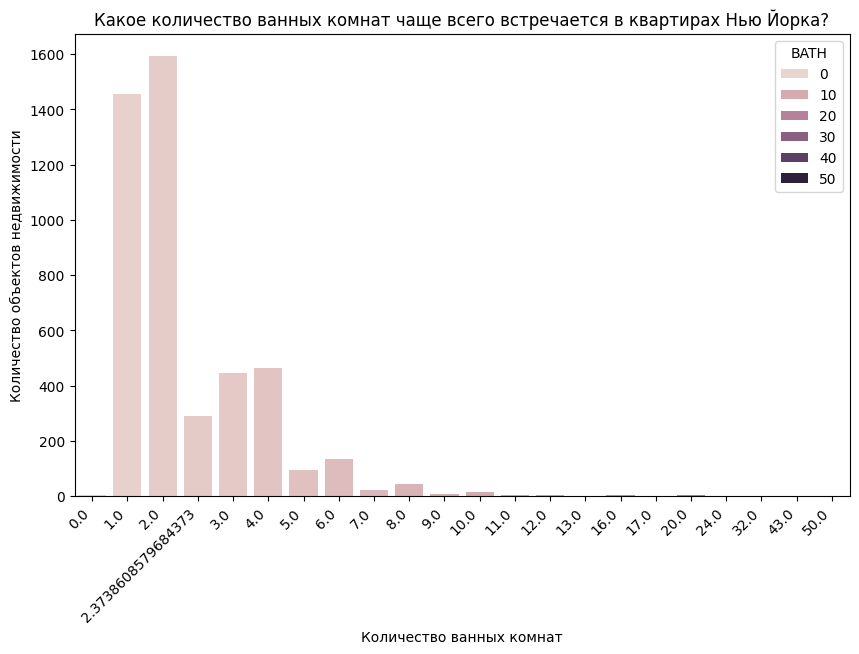

In [28]:
# Интересно а какие сколько ванных комнат чаще всего в объектах в нашем наборе данных?
plt.figure(figsize=(10, 6))

sns.countplot(x='BATH', data=df, hue='BATH')
plt.title('Какое количество ванных комнат чаще всего встречается в квартирах Нью Йорка?')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Количество объектов недвижимости')
plt.xticks(rotation=45, ha='right')
plt.show()

Что то странное!? проверим числами, анализ позже

In [29]:
# Проверим числами!
df['BATH'].value_counts()

BATH
2.000000     1593
1.000000     1456
4.000000      464
3.000000      447
2.373861      288
6.000000      133
5.000000       95
8.000000       43
7.000000       23
10.000000      16
9.000000        7
16.000000       5
20.000000       3
12.000000       3
11.000000       2
0.000000        2
32.000000       1
13.000000       1
50.000000       1
24.000000       1
43.000000       1
17.000000       1
Name: count, dtype: int64

Мы видим несколько странных вещей есть ажн 288 строк где значение количества ванных комнат 2.373861, очевидно что такого не может быть, плюс мы видим, что у нас есть значение в 50, 43, 32, 20 - очевидно что это что то странное, возможно это аномалии. Если после дропа выбросов ситуация не поменяется - мы вынуждены будем не брать в обучение модели признак ванных 

### 6-й График - как цена зависит от площади объекта недвижимости?

Вспомним корреляцию о том, что цена зависит от площади и посмотрим на графическое распределение

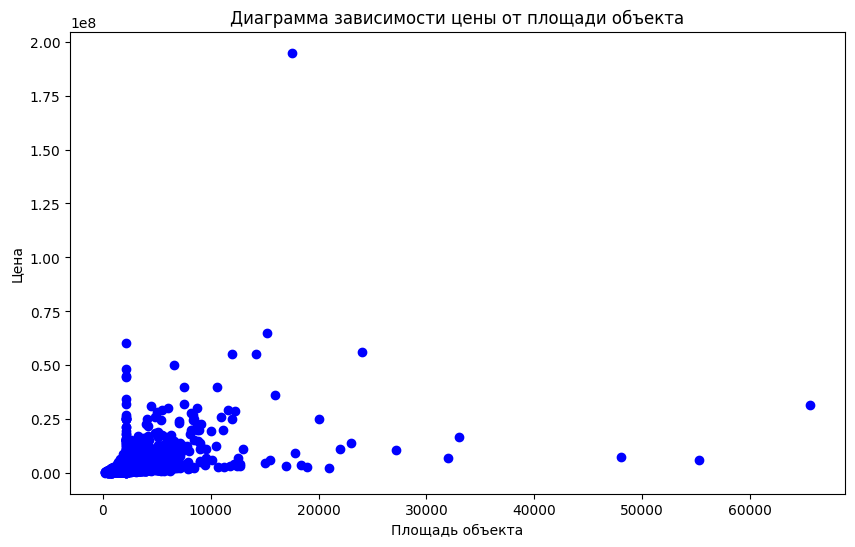

In [30]:
# Создание точечной диаграммы
plt.figure(figsize=(10, 6))
plt.scatter(df['PROPERTYSQFT'], df['PRICE'], color='blue')
plt.title('Диаграмма зависимости цены от площади объекта')
plt.xlabel('Площадь объекта')
plt.ylabel('Цена')
plt.show()

Да зависимость ярко не видна, нам мешают выбросы по площади и цене

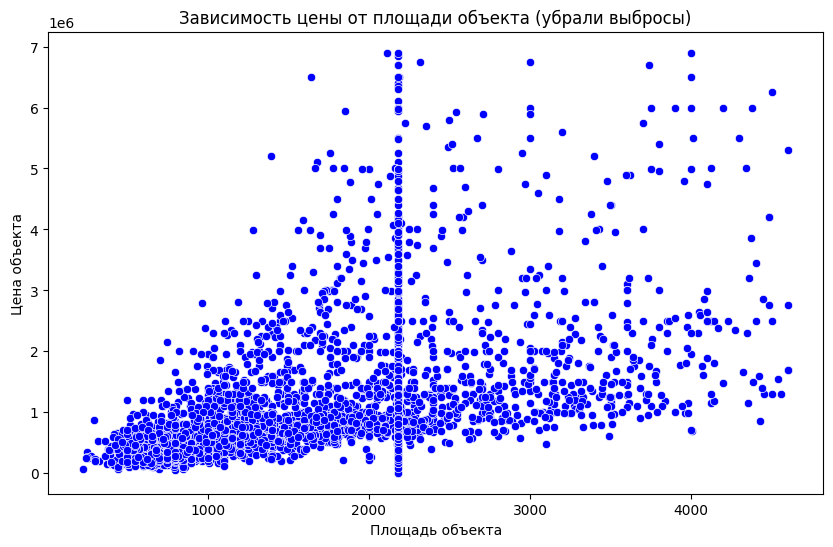

In [31]:
# попробуем отсечь лишние значения

# Определение пороговых значений
property_sqft_threshold = df['PROPERTYSQFT'].quantile(0.95)
price_threshold = df['PRICE'].quantile(0.95)

# Фильтрация данных по пороговым значениям
filtered_df = df[(df['PROPERTYSQFT'] <= property_sqft_threshold) & (df['PRICE'] <= price_threshold)]

# Создание точечной диаграммы
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=filtered_df, color='blue')
plt.title('Зависимость цены от площади объекта (убрали выбросы)')
plt.xlabel('Площадь объекта')
plt.ylabel('Цена объекта')
plt.show()

Отлично, вот тут мы видим несильный но все же восходящий тренд, который говорит о том, что у пощади и цены прямая положительная зависимость. Что самое замечательное после отсечения мы четко выдим группу объектов недвижимости в одинаковой площадью в районе среднего - 2182, но с очень разной ценой. Попробуем налдожить на этот график тип объявление, и посмотрим удасться ли выявить какую то закономерность. Накладывать будем с помощью цвета

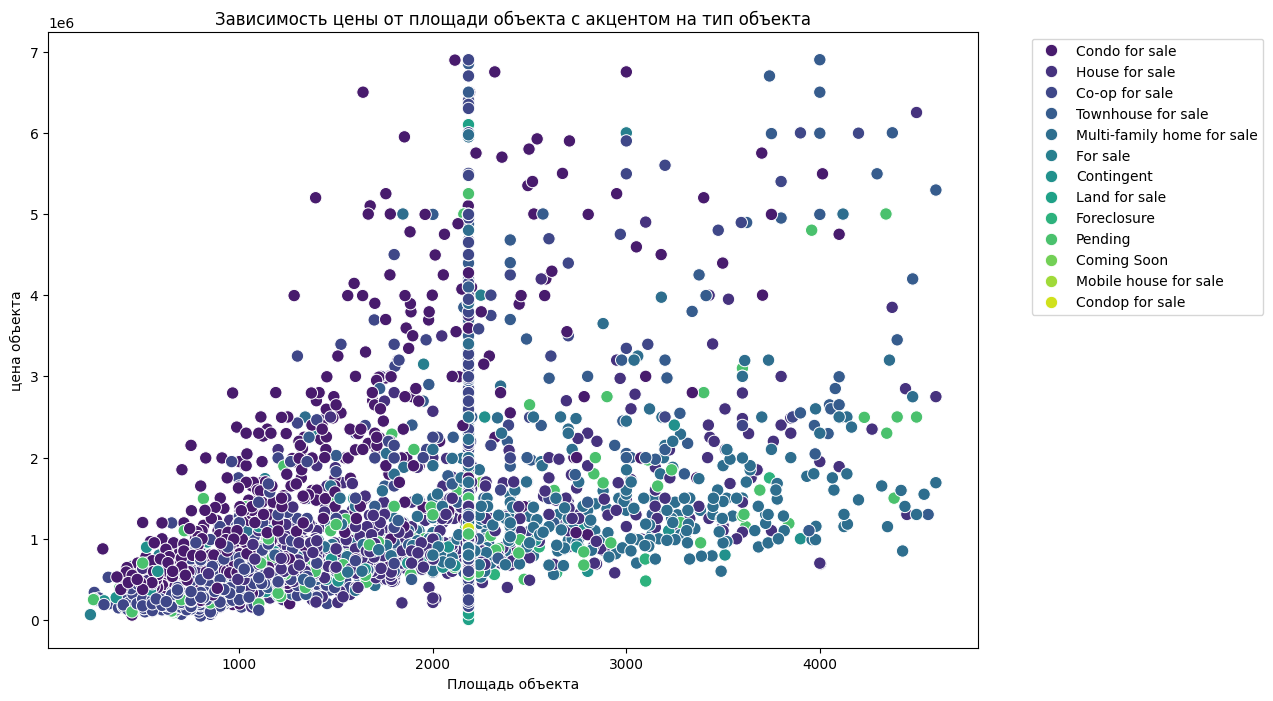

In [32]:
# Создание точечной диаграммы с выделением цветом по TYPE
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', hue='TYPE', data=filtered_df, palette='viridis', legend='full', s=80)
plt.title('Зависимость цены от площади объекта с акцентом на тип объекта')
plt.xlabel('Площадь объекта')
plt.ylabel('цена объекта')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Перемещение легенды за пределы графика
plt.show()

ЧТо мы видим - Condo и дома несколько выше по цене чем аналогичные объекты такой же площади, а так же то что после 2000 ед площади домой и Condo становится меньше, сто тоже интересный факт

### 7-й график. Ящик с усами. Посмотрим на цену в зависимости от локации

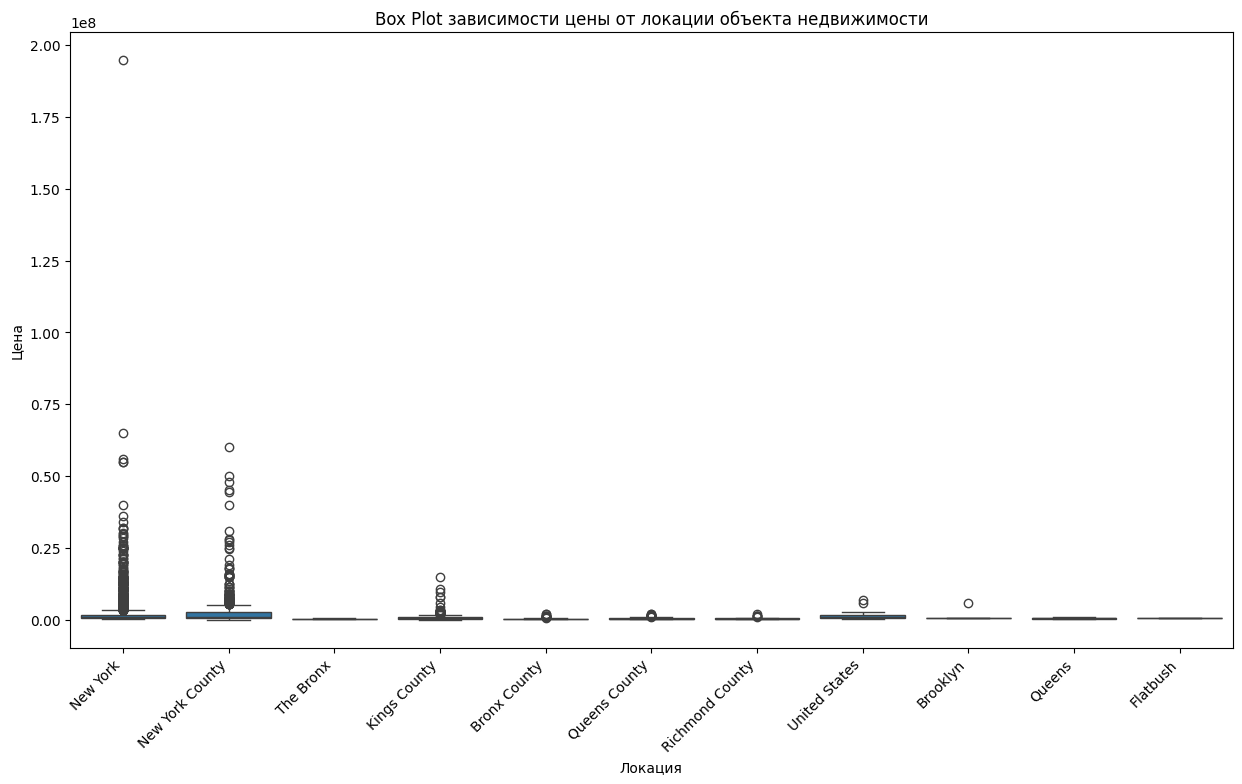

In [33]:
# Создание диаграммы ящика с усами
plt.figure(figsize=(15, 8))
sns.boxplot(x='LOCALITY', y='PRICE', data=df)
plt.title('Box Plot зависимости цены от локации объекта недвижимости')
plt.xlabel('Локация')
plt.ylabel('Цена')
plt.xticks(rotation=45, ha='right')  # Поворот меток на оси x для улучшения читаемости
plt.show()

Непонятно ничего - такой график не информативет и его нельзя осталять, разве что мы видим и еще раз подтверждаем что в районах New York и New York County самое большое количество выбросов и они очень долеко отстоят от 75 квантиля, на третьем месте идет район Kings County. Очевидно нам в очередной раз следует обрезать значения непомерно высокой цены как выбросы. Пока уберем выбросы не вручную а с помощью фильтра в коробке диаграммы showfliers=False

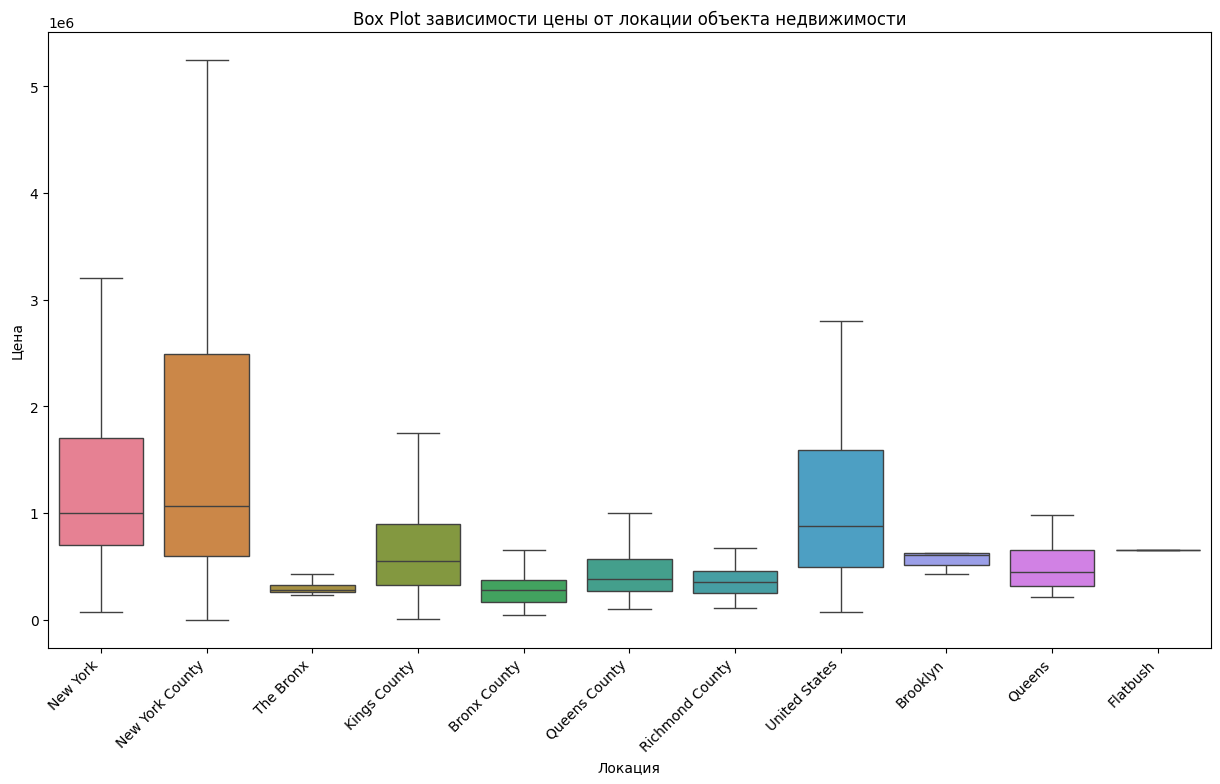

In [34]:
# Создание диаграммы ящика с усами
plt.figure(figsize=(15, 8))
sns.boxplot(x='LOCALITY', y='PRICE', data=df, hue='LOCALITY', showfliers=False)
plt.title('Box Plot зависимости цены от локации объекта недвижимости')
plt.xlabel('Локация')
plt.ylabel('Цена')
plt.xticks(rotation=45, ha='right')  # Поворот меток на оси x для улучшения читаемости
plt.show()

Отлично, мы получили красивый и гораздо более информативный график. Мы видим что самые дорогие квартиры как по медиане так и по 75 квантилю в районах New York County, New York, United States. В Бронксе цены достаточно плотно распределены, а упомянутый Flatbush имеет одинаковые цены на все объекты. Самые низкие цены почему то все в том же New York County (что странно) и в Kings County. Самый большой разброс цен в New York County

### 8-й график. Круговая диаграмма распределения объектов по количеству комнат

In [35]:
# Сначала посмотрим какие варианты тут у нас есть
df['BEDS'].value_counts()

BEDS
3     1397
2      950
1      779
4      544
5      339
6      260
7       99
8       81
9       38
12      22
10      21
11      20
14       6
15       5
13       5
16       4
20       3
24       3
32       2
35       1
50       1
36       1
42       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64

Так же как и с ванными мы видим что то непонятное есть более 30 комнат (возможно речь идет о многоквартирном доме), а кстати может поэтому у него такая цена и метка типа объявления? 

In [36]:
df[df['BEDS'] >= 30]

index                                       BROKERTITLE  \
745     765                           Brokered by RE MAX Edge   
1109   1143        Brokered by Blue Key Real Estate Brokerage   
2183   2265              Brokered by Coldwell Banker Reliable   
2395   2488      Brokered by RE MAX Real Estate Professionals   
2549   2653                   Brokered by NEUHAUS REALTY INC.   
3153   3276           Brokered by Weichert Realtors TMT Group   
3449   3589  Brokered by Coldwell Banker Reliable Real Estate   
3462   3603                    Brokered by BHHS Fillmore R.E.   

                            TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
745   Multi-family home for sale   4380000    35 16.000000  15000.000000   
1109  Multi-family home for sale  11000000    50 50.000000  22035.000000   
2183              House for sale   4000000    32 12.000000   7188.000000   
2395  Multi-family home for sale   3099000    36 16.000000  12460.000000   
2549  Multi-family home for sale  10700000    42 43.000000  27152.000000   
3153  Multi-family home for sale   5980000    40 20.000000  15500.000000   
3449  Multi-family home for sale   4000000    32 12.000000   7200.000000   
3462  Multi-family home for sale   3500000    30 20.000000  18400.000000   

                        ADDRESS                      STATE  \
745       8699 Bay Pkwy Unit 16         Brooklyn, NY 11214   
1109              8820 Avenue J         Brooklyn, NY 11236   
2183             150 E 105th St         New York, NY 10029   
2395               5206 6th Ave         Brooklyn, NY 11220   
2549  646-662 Port Richmond Ave    Staten Island, NY 10302   
3153              35-54 95th St  Jackson Heights, NY 11372   
3449             154 E 105th St         New York, NY 10029   
3462           1319 Newkirk Ave         Brooklyn, NY 11230   

                                          MAIN_ADDRESS  \
745            8699 Bay Pkwy Unit 16Brooklyn, NY 11214   
1109                   8820 Avenue JBrooklyn, NY 11236   
2183                  150 E 105th StNew York, NY 10029   
2395                    5206 6th AveBrooklyn, NY 11220   
2549  646-662 Port Richmond AveStaten Island, NY 10302   
3153            35-54 95th StJackson Heights, NY 11372   
3449                  154 E 105th StNew York, NY 10029   
3462                1319 Newkirk AveBrooklyn, NY 11230   

     ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY    STREET_NAME  \
745                United States  New York     Kings County       Brooklyn   
1109               United States  New York     Kings County       Brooklyn   
2183               United States  New York  New York County       New York   
2395               United States  New York     Kings County       Brooklyn   
2549               United States  New York  Richmond County  Staten Island   
3153               United States  New York    Queens County         Queens   
3449               United States  New York  New York County       New York   
3462               United States  New York     Kings County       Brooklyn   

                 LONG_NAME                                  FORMATTED_ADDRESS  \
745                   8699         8699 Bay Pkwy #16, Brooklyn, NY 11214, USA   
1109              Avenue J             8820 Avenue J, Brooklyn, NY 11236, USA   
2183     East 105th Street            150 E 105th St, New York, NY 10029, USA   
2395            6th Avenue              5206 6th Ave, Brooklyn, NY 11220, USA   
2549  Port Richmond Avenue  646 Port Richmond Ave, Staten Island, NY 10302...   
3153           95th Street             35-54 95th St, Flushing, NY 11372, USA   
3449     East 105th Street            154 E 105th St, New York, NY 10029, USA   
3462        Newkirk Avenue          1319 Newkirk Ave, Brooklyn, NY 11230, USA   

      LATITUDE  LONGITUDE  
745  40.599715 -73.995694  
1109 40.637696 -73.904836  
2183 40.791288 -73.946522  
2395 40.642652 -74.009674  
2549 40.627671 -74.142352  
3153 40.751468 -73.872619  
3449 40.791206 -73.94651

Наша догадка верна и это много квартирные дома, которые целиком выставлены на продажу, нет никаких бунгало в 50 ванными это просто большие многоквартирные дома. Мы видим у них соответствующий лейбл TYPE и немаленькую цену. Хотя один объект все же образает на себя внимание - это дом по адресу 150 E 105th StNew York, NY 10029 всего за 4 000 000 в котором 32 комнаты и 12 ванных - неплохо)

Мы хотим построить круговую диаграмму, для нее желательно не более 5 категорий, 5 у нас не получится но схлопнем дома от 7 комнат в 7+, что бы было красиво

C:\Users\HP\AppData\Local\Temp\ipykernel_5288\4260428621.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['BEDS_C'] > 6, 'BEDS_C'] = '7+'


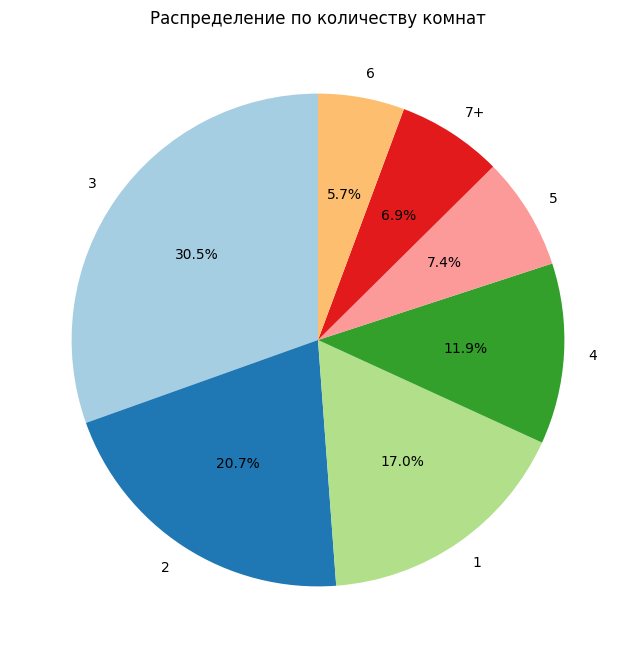

In [37]:
# Преобразование количества комнат в категориальные значения
df['BEDS_C'] = df['BEDS']

# Замена значений больше 6 на 7+ грубо, но что сделать
df.loc[df['BEDS_C'] > 6, 'BEDS_C'] = '7+'

df['BEDS_C'] = df['BEDS_C'].astype('category')

# Получение количества комнат
room_counts = df['BEDS_C'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Распределение по количеству комнат')
plt.show()

Что мы видим? Наибольная доля объектов недвижимости имеют по 3 комнаты - 30%, на втром месте 2шки - 20.7%, однушки занимают почетное 3-е место с 17%. К слову объектов с 7+ комнатами немало - почти 7%

In [38]:
# почти всегда график должна сопровождать таблица с конкретными числами - вот она
room_counts

BEDS_C
3     1397
2      950
1      779
4      544
5      339
7+     317
6      260
Name: count, dtype: int64

## Задание 1.2 Сбор дашборда

В рамках модуля мы научились использовать функцию plt.subplots для создания "полотна" с целью отображения нескольких графиков на одном поле. Создайте полотно размером 3x2 (три строки и два столбца). На этом полотне изобразите все графики, которые ранее были созданы в Задании 1.1.

In [39]:
def subplots_class():
  fig, axs = plt.subplots(3, 2, figsize=(20, 20))

  fig.suptitle('Поле графиков с тремя строчками и двумя столбцами', fontsize=18) # Установка названия для всего поля

  # Первый график
  sns.barplot(ax=axs[0, 0], x = type_of_sale.index, y=type_of_sale.values, hue=type_of_sale.index)
  axs[0, 0].set_title('Распределение по типам объектов недвижимости', fontsize=15)
  axs[0, 0].set_xlabel('Тип недвижимости')
  axs[0, 0].set_ylabel('Количество объектов')
  axs[0, 0].tick_params(axis='x', rotation=45)

  # второй график
  df_low_price = df[df['PRICE'] < 10000000]
  axs[0, 1].hist(df_low_price['PRICE'], bins=50)
  axs[0, 1].set_title('Распределение цены на объекты нежвижимости в Нью Йорке (цена менее 10 млн.долл)', fontsize=15)
  axs[0, 1].set_xlabel("Цена на недвижимость")
  axs[0, 1].set_ylabel("Частота")
  axs[0, 1].tick_params(axis='x', rotation=35)

  # Третий график
  sns.barplot(ax=axs[1, 0], x='LOCALITY', y='mean', data=df_locality_info, color='blue', label='Mean')
  sns.barplot(ax=axs[1, 0], x='LOCALITY', y='median', data=df_locality_info, color='orange', label='Median')
  axs[1, 0].set_xlabel("Локация объекта недвижимости")
  axs[1, 0].set_ylabel("Средние цены")
  axs[1, 0].set_title("Средние и медианные цены по локациям", fontsize=15)
  axs[1, 0].tick_params(axis='x', rotation=45)

  # Четвертый график
  sns.boxplot(ax=axs[1, 1], x='LOCALITY', y='PRICE', data=df, hue='LOCALITY', showfliers=False)
  axs[1, 1].set_xlabel("Локация объекта недвижимости")
  axs[1, 1].set_ylabel("Цена")
  axs[1, 1].set_title("Box Plot зависимости цены от локации объекта недвижимости", fontsize=15)
  axs[1, 1].tick_params(axis='x', rotation=45)

    # Пятый график
  sns.scatterplot(ax=axs[2, 0], x='PROPERTYSQFT', y='PRICE', data=filtered_df, color='blue')
  axs[2, 0].set_xlabel("Площадь объекта")
  axs[2, 0].set_ylabel("Цена объекта")
  axs[2, 0].set_title("Зависимость цены от площади объекта (убрали выбросы)", fontsize=15)
  axs[2, 0].tick_params(axis='x', rotation=45)

    # Шестой график
  axs[2, 1].pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
  axs[2, 1].set_title('Распределение по количеству комнат', fontsize=15)

  plt.tight_layout()
  plt.show()



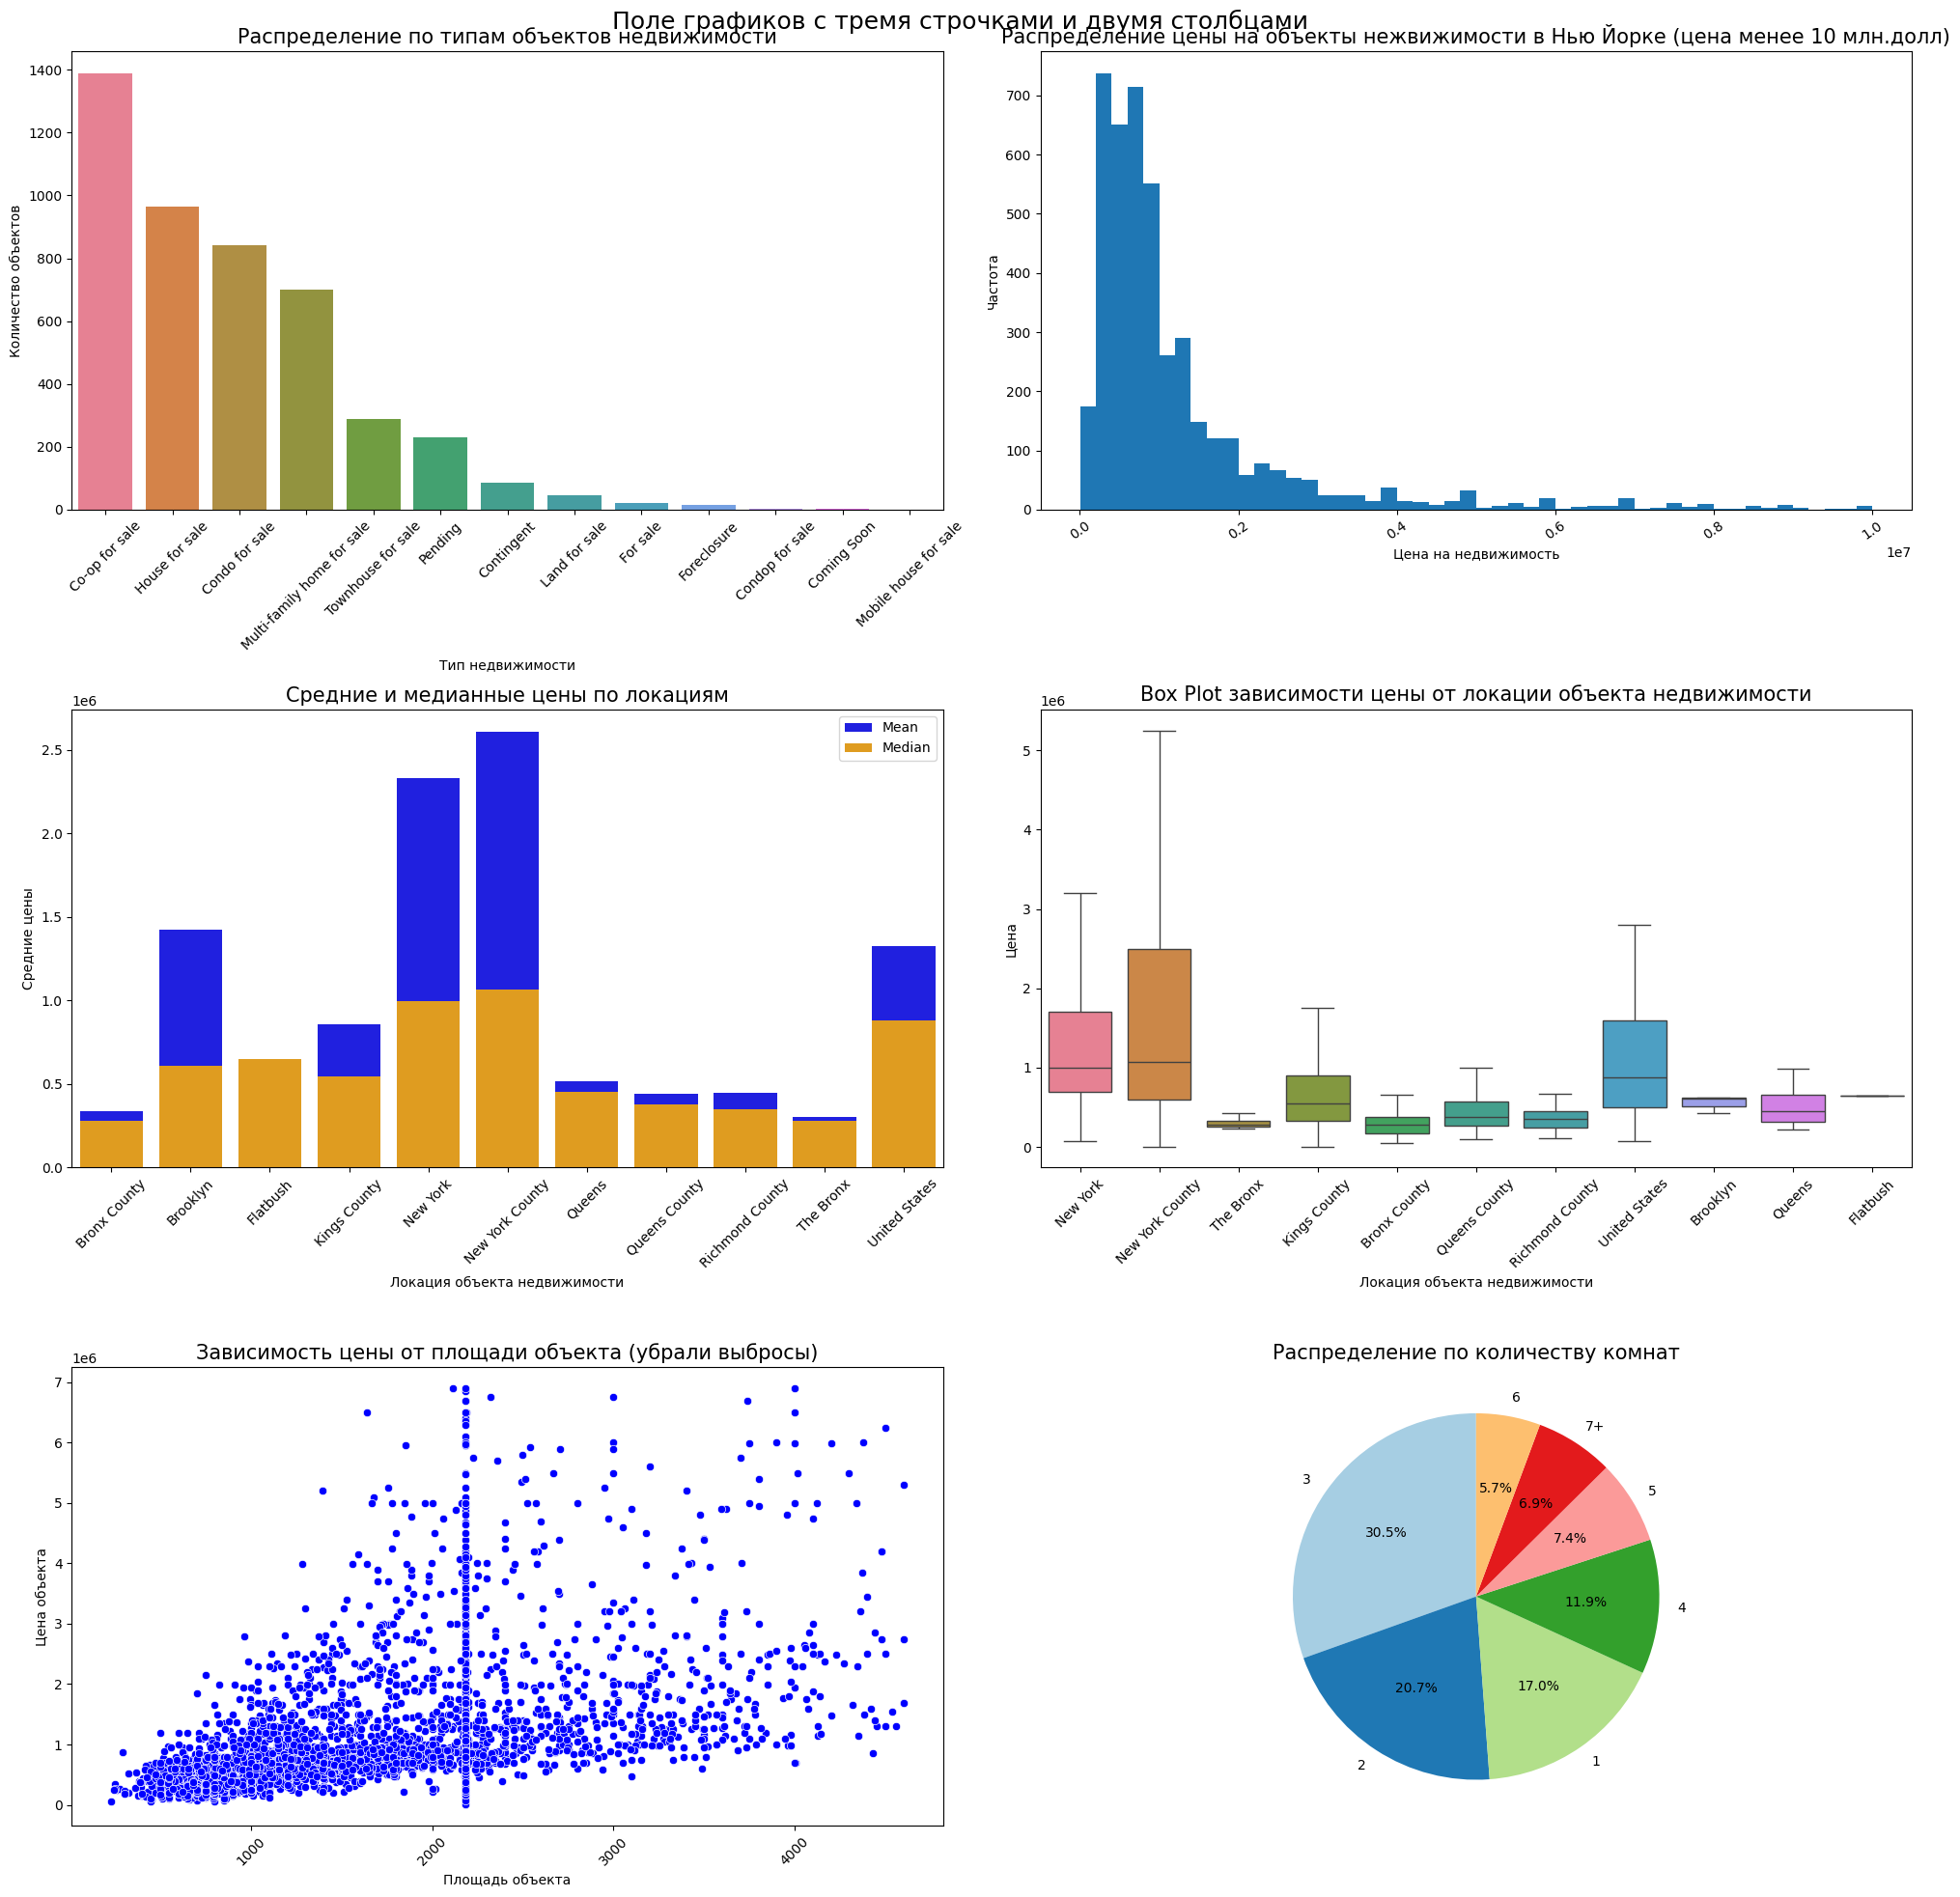

In [40]:
subplots_class()

Получилось очень красиво!!!

## Задание 1.3

Интерпретируйте полученные результаты. К каждому графику напишите описание - какую полезную информацию мы получили в результате использования этой визуализации. Постарайтесь сделать это максимально подробно и полно.

Что бы не дублировать графики, сохранить некоторую логику исследования, я описывал графики в пункте 1.1 и делал выводы походу интерпретируя результаты (ознакомьтесь с моими выводами в текстовых описаниях в разделе 1.1) - там есть интересные инсайты

## Задание 1.4

Как район влияет на стоимость жилья?

Мы уже обращались к этому вопросу попробуем проиллюстрировать ситуацию с помощью еще одного вида графика

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

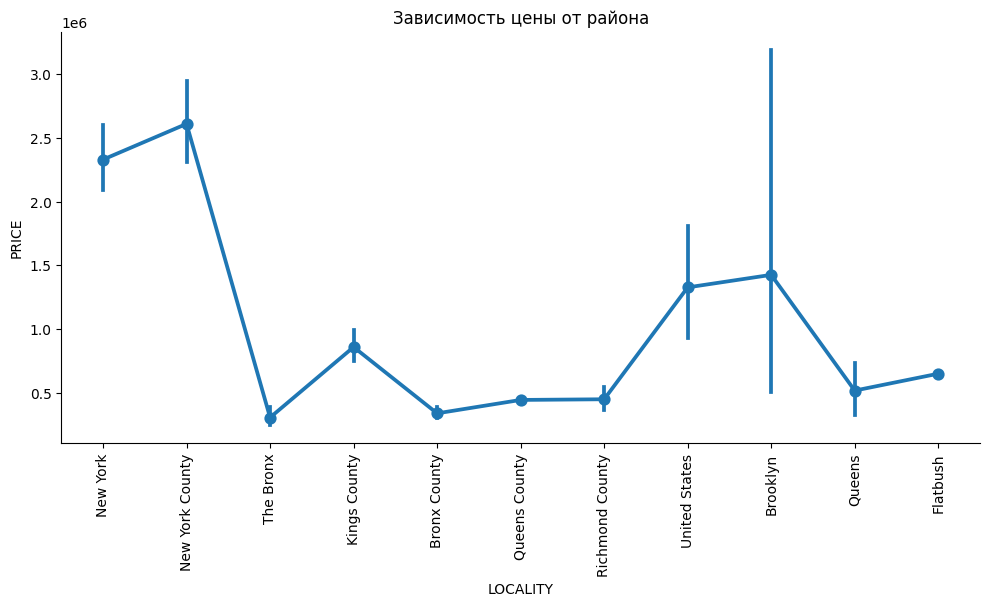

In [41]:
fig = plt.figure()
sns.catplot(data=df, x='LOCALITY', y='PRICE', kind='point', height=5, aspect=2)
plt.title("Зависимость цены от района")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()


Мы видим все теже самые данные, но вот что интересно без отсечения у нас максимальный разброс низ - верх в Бруклине!

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

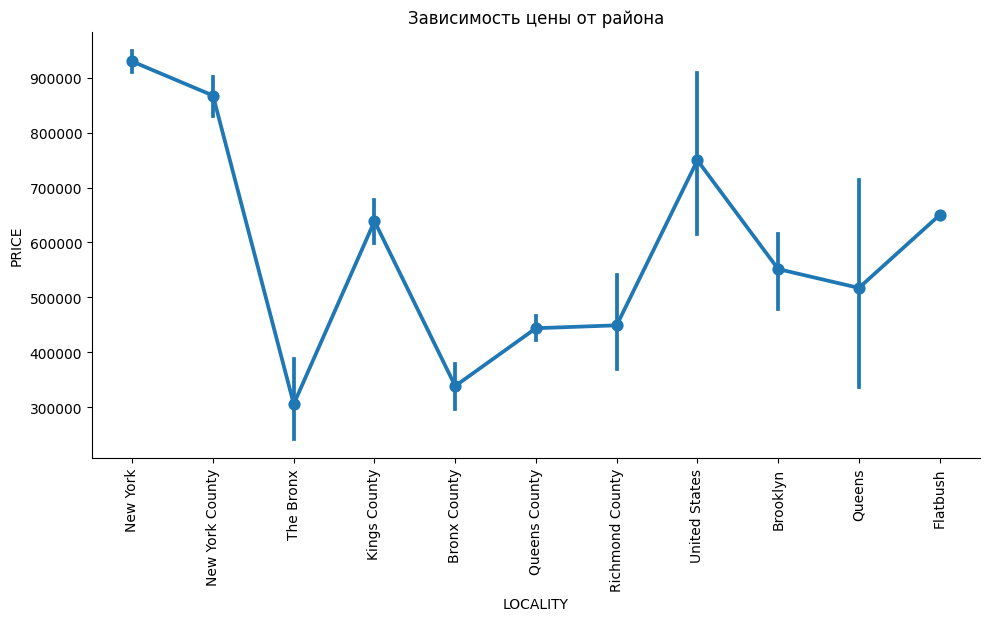

In [42]:
fig = plt.figure()
sns.catplot(data=df[df['PRICE'] < 2000000], x='LOCALITY', y='PRICE', kind='point', height=5, aspect=2)
plt.title("Зависимость цены от района")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

Вот тут все меняется, очевидно в бруклине как раз и были многоквартирные дома, о которых мы говорили ранее, теперь максимальный разброс в районе Квинс и United States.

Вернемся к пунктам задания

В наших данных есть столбец TYPE, отвечающий за тип проданной недвижимости (квартира, дом, таунхаус и т.д.).
Создайте barplot, на котором будет показана средняя стоимость недвижимости разных типов в New York County (столбец SUBLOCALITY).

Меры среднего для нас это или медиана или среднее, подготовим 2 варианта заготовок, но стоит помнить что при наличии выбросов, а они у нас есть лучше доверять медиане. И еще раз напомним себе это TYPE это скорее не тип недвижимости, а тип объявления

In [43]:
# срез по медиане в New York County
df_type_info_median = df[df['SUBLOCALITY'] == 'New York County'].groupby('TYPE').agg({
    'PRICE' : 'median',
    'BEDS' : 'median',
    'BATH' : 'median',
    'PROPERTYSQFT' : 'median'
})

In [44]:
df_type_info_median

PRICE     BEDS     BATH  PROPERTYSQFT
TYPE                                                                      
Co-op for sale              2250000.000000 3.000000 3.000000   2184.207862
Condo for sale              5325000.000000 4.000000 3.000000   2685.000000
Contingent                 12850000.000000 5.000000 5.000000   5139.000000
For sale                    1740000.000000 2.000000 2.000000   1132.000000
Foreclosure                 1749900.000000 5.000000 4.000000   3740.000000
House for sale              8999999.000000 5.000000 4.000000   5500.000000
Land for sale               1200000.000000 3.000000 2.373861   2184.207862
Multi-family home for sale  3720000.000000 6.000000 4.000000   3735.000000
Pending                     1997500.000000 5.000000 3.186930   2184.207862
Townhouse for sale          8262500.000000 6.000000 4.000000   4976.000000

In [45]:
# срез по среднему в New York County
df_type_info_mean = df[df['SUBLOCALITY'] == 'New York County'].groupby('TYPE').agg({
    'PRICE' : 'mean',
    'BEDS' : 'mean',
    'BATH' : 'mean',
    'PROPERTYSQFT' : 'mean'
})

In [46]:
df_type_info_mean

PRICE     BEDS     BATH  PROPERTYSQFT
TYPE                                                                      
Co-op for sale              4712067.567568 3.027027 3.027027   2438.177648
Condo for sale             11685863.636364 3.500000 3.261260   3142.346527
Contingent                 12850000.000000 5.000000 5.000000   5139.000000
For sale                    1656666.666667 1.666667 1.666667   1051.000000
Foreclosure                 1749900.000000 5.000000 4.000000   3740.000000
House for sale             13046935.419355 6.225806 4.673203   6759.510692
Land for sale               1200000.000000 3.000000 2.373861   2184.207862
Multi-family home for sale  7661090.476190 8.333333 5.850919   4274.763777
Pending                     8661875.000000 4.250000 4.296733   4115.827948
Townhouse for sale         11425213.701613 5.887097 4.989681   5455.553325

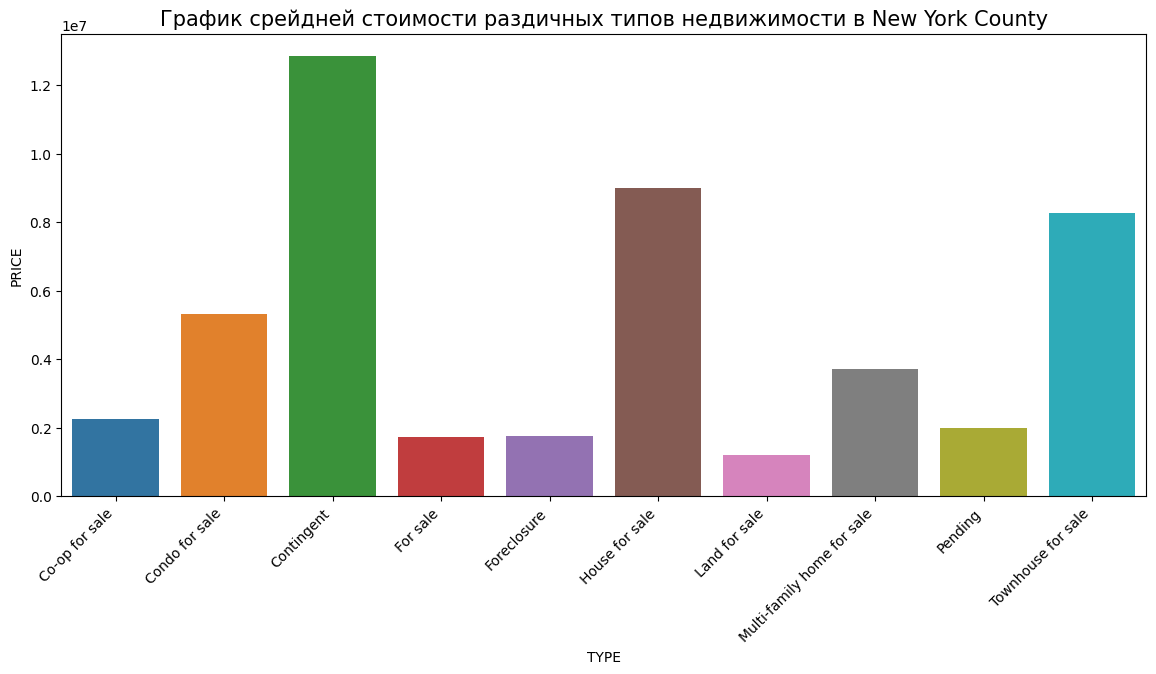

In [47]:
plt.figure(figsize=(14, 6))
sns.barplot(x='TYPE', y='PRICE', data=df_type_info_median, hue='TYPE')
plt.xticks(rotation=45, ha='right')
plt.title('График срейдней стоимости раздичных типов недвижимости в New York County',fontsize=15)
plt.show()

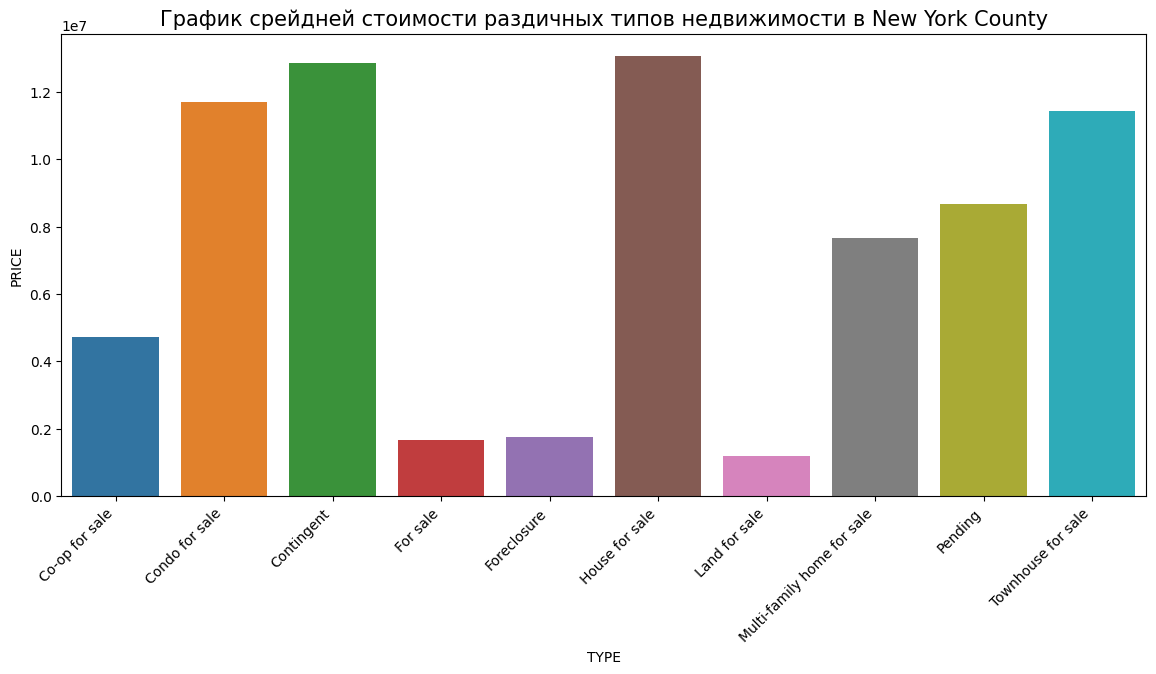

In [48]:
plt.figure(figsize=(14, 6))
sns.barplot(x='TYPE', y='PRICE', data=df_type_info_mean, hue='TYPE')
plt.xticks(rotation=45, ha='right')
plt.title('График срейдней стоимости раздичных типов недвижимости в New York County',fontsize=15)
plt.show()

Что же как ни посмотри лидируют у нас такие типы как Contingent и House for sale. А вот третье место распределилось по разному. Для медианного распределения это таунхайсы, а для среднего это Condo, из чего очевидно, что в выборке есть ну очень дорогие Condo

## Задание 1.5

Какой тип квартир самый популярный в разных районах?
В столбце SUBLOCALITY указан район расположения объектов недвижимости. Всего в этом столбце 21 разных районов. Однако некоторые из них содержат слишком маленькое количество наблюдений.

Оставьте только те районы (столбец SUBLOCALITY), количество наблюдений в которых больше или равно 100.
Для оставшихся районов сделайте barh plot, в котором для каждого района будет указана доля квартир разных видов (столбец TYPE).
Полученные значения отсортируйте по убыванию по доле квартир (Condo for sale).
Подсказка: аналогичный алгоритм мы рассматривали на лекции в ходе вычисления доли женщин, берущих кредит.

Отлично! Теперь мы ориентируемся в данных, понимаем их структуру и особенности. Можно переходить к очистке от выбросов перед созданием модели.

In [49]:
# отсекаем районы где менее 100 наблюдение и получаем их список
regions = df['SUBLOCALITY'].value_counts()[df['SUBLOCALITY'].value_counts()>=100]
list_regions = list(regions.index)

In [50]:
list_regions

['New York',
 'Kings County',
 'Queens County',
 'Queens',
 'Richmond County',
 'Brooklyn',
 'Bronx County',
 'New York County',
 'The Bronx']

In [51]:
# выполняем группировки по условию задачи
regions_by_price = df[df['SUBLOCALITY'].isin(list_regions)]\
   .groupby(['SUBLOCALITY', 'TYPE'], group_keys=False)['TYPE']\
   .count()\
   .groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum())\
   .unstack('TYPE')\
   .fillna(0)\
   .sort_values(ascending=False, by=['Condo for sale'])

In [52]:
regions_by_price

TYPE             Co-op for sale  Coming Soon  Condo for sale  Condop for sale  \
SUBLOCALITY                                                                     
Brooklyn              47.058824     0.000000       41.176471         0.000000   
New York              54.808687     0.000000       33.298862         0.310238   
Queens                70.973783     0.000000       24.719101         0.000000   
The Bronx             78.160920     0.000000       17.241379         0.000000   
New York County       13.653137     0.000000       16.236162         0.000000   
Queens County          7.328244     0.000000        4.580153         0.000000   
Kings County           2.011494     0.287356        3.879310         0.000000   
Bronx County           4.810997     0.000000        2.749141         0.000000   
Richmond County        0.000000     0.000000        2.391304         0.000000   

TYPE             Contingent  For sale  Foreclosure  House for sale  \
SUBLOCALITY                                                          
Brooklyn           0.904977  0.226244     0.000000        0.904977   
New York           1.240951  1.240951     0.103413        3.309204   
Queens             0.000000  0.000000     0.000000        0.187266   
The Bronx          0.000000  0.000000     0.000000        1.149425   
New York County    0.369004  1.107011     0.369004       11.439114   
Queens County      0.000000  0.000000     0.305344       44.122137   
Kings County       1.005747  0.574713     0.143678       35.057471   
Bronx County       0.000000  0.000000     0.343643       39.518900   
Richmond County   11.521739  0.000000     1.739130       53.695652   

TYPE             Land for sale  Mobile house for sale  \
SUBLOCALITY                                             
Brooklyn              0.452489               0.000000   
New York              0.206825               0.000000   
Queens                0.000000               0.000000   
The Bronx             0.000000               0.000000   
New York County       0.369004               0.000000   
Queens County         1.526718               0.152672   
Kings County          2.011494               0.000000   
Bronx County          3.436426               0.000000   
Richmond County       1.739130               0.000000   

TYPE             Multi-family home for sale  Pending  Townhouse for sale  
SUBLOCALITY                                                               
Brooklyn                           1.583710 6.787330            0.904977  
New York                           1.344364 3.929679            0.206825  
Queens                             0.187266 3.932584            0.000000  
The Bronx                          0.000000 2.873563            0.574713  
New York County                    7.749077 2.952030           45.756458  
Queens County                     30.839695 7.328244            3.816794  
Kings County                      35.344828 5.890805           13.793103  
Bronx County                      43.986254 2.061856            3.092784  
Richmond County                   16.739130 6.521739            5.652174

In [53]:
# выделим типы домов в отдельную переменную
list_of_columns = list(regions_by_price.columns)

In [54]:
list_of_columns

['Co-op for sale',
 'Coming Soon',
 'Condo for sale',
 'Condop for sale',
 'Contingent',
 'For sale',
 'Foreclosure',
 'House for sale',
 'Land for sale',
 'Mobile house for sale',
 'Multi-family home for sale',
 'Pending',
 'Townhouse for sale']

In [55]:
regions_by_price = regions_by_price[list_of_columns]

Мы готовы построить это сложное распределение по заданию

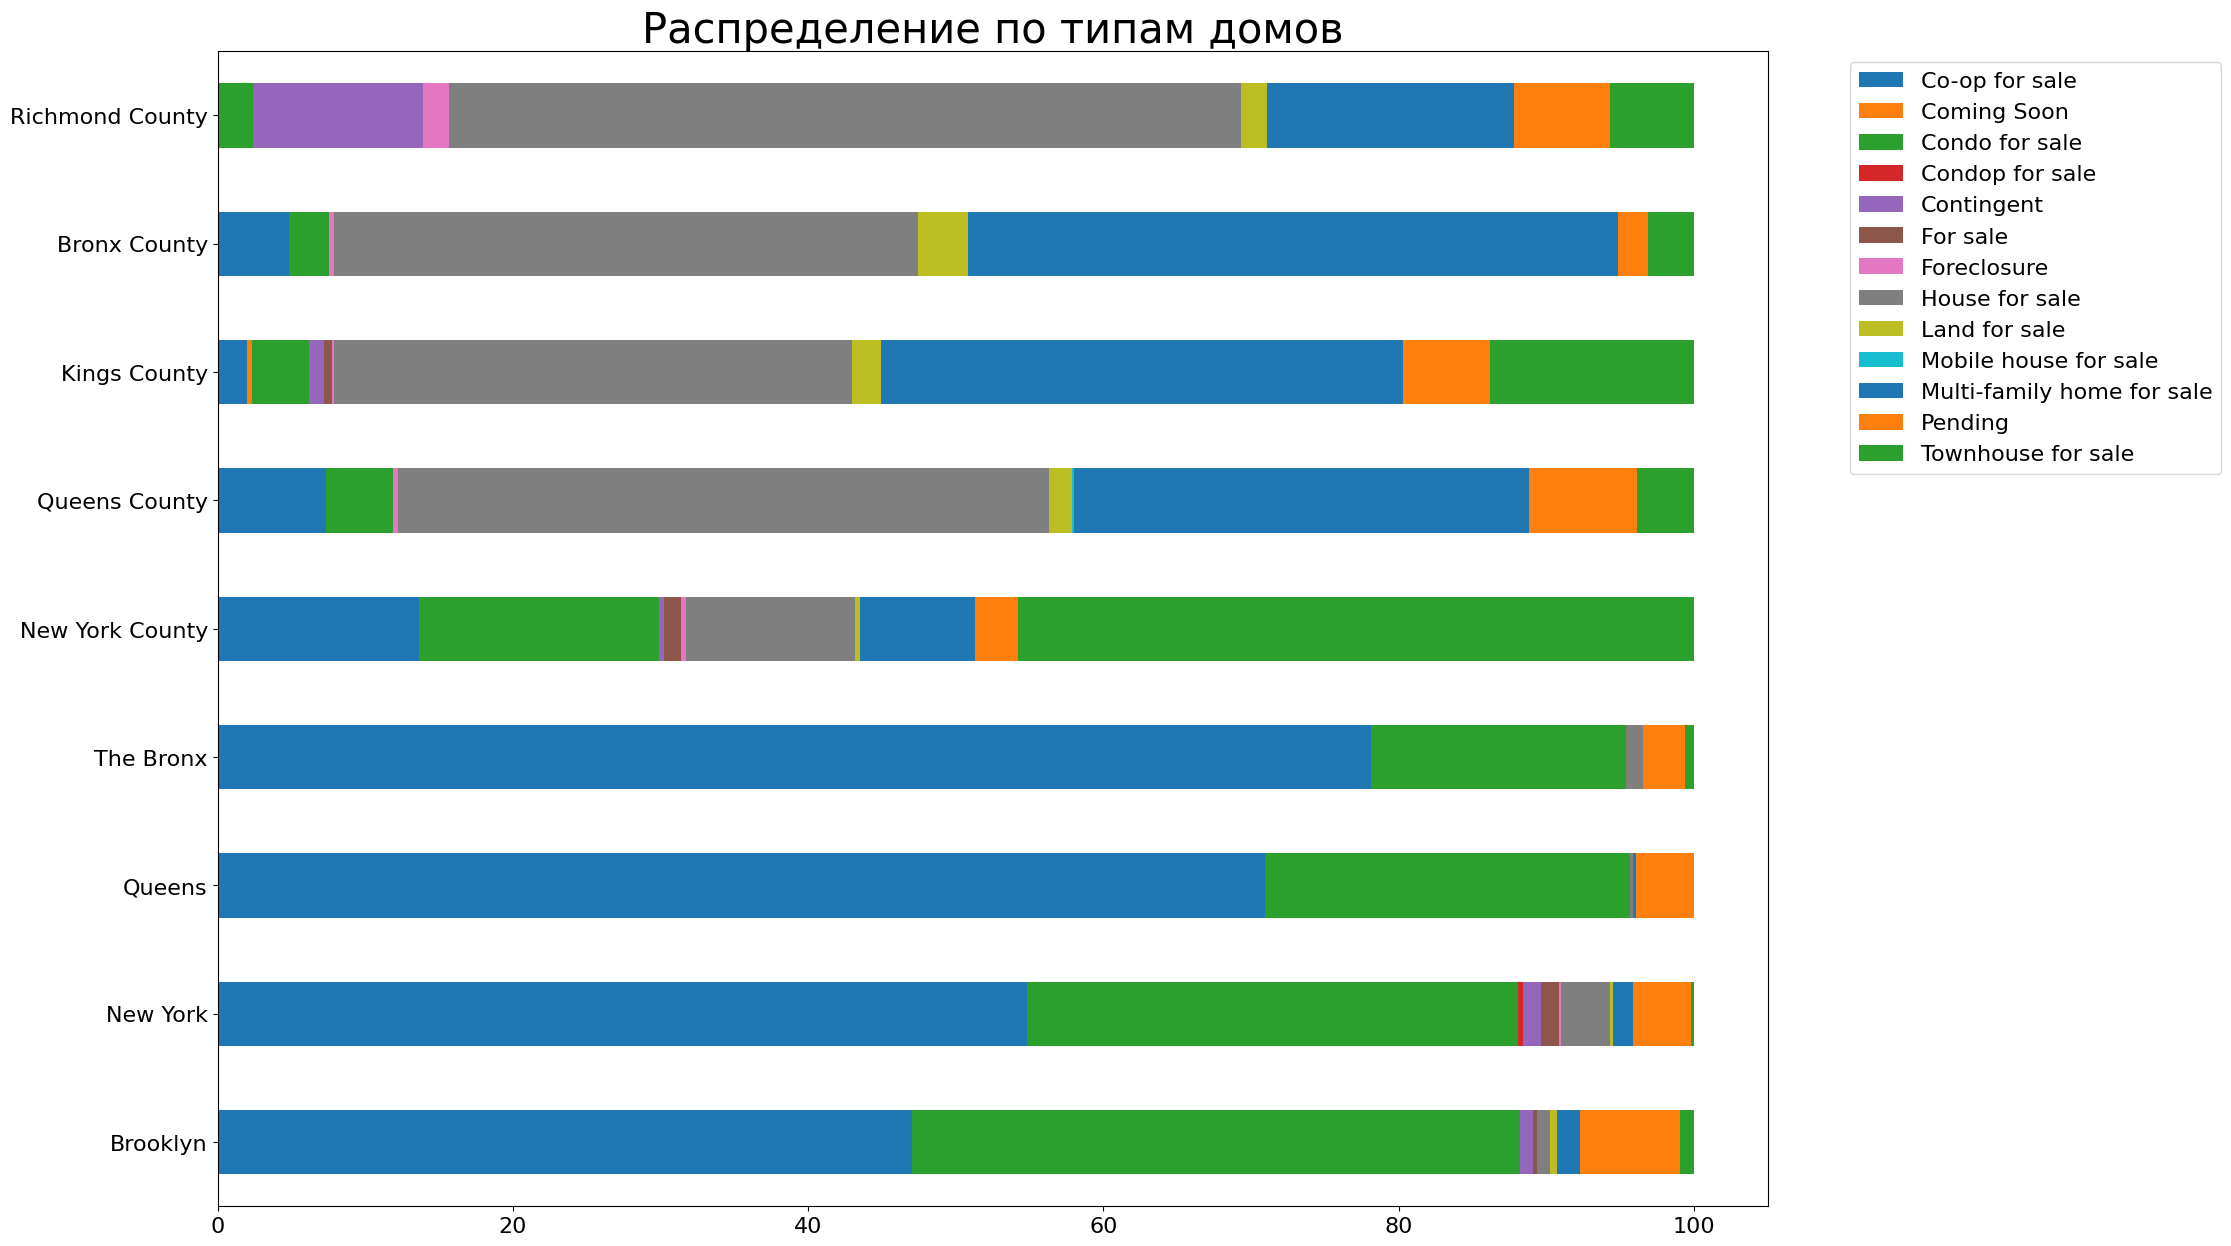

In [56]:
plot = regions_by_price.plot.barh(
       figsize=(20,15)
       , fontsize=16
       , stacked=True
       , title='Распределение по типам домов')
plot.title.set_size(30)
plot.legend(loc=1, bbox_to_anchor=(1.3, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Получился очень красивый график. Мы можем увидеть, что в дорогом New York Count львиная доля это таунхаусы, в Бронксе многоквартирные дома, в Ричмонде - протсо дома

# Задание 2. Работа с выбросами

Очень удобно что график получился интерактивный и при наведении мыши мы можем видеть конкретные значения!

## Задание 2.1 Поиск выбросов

В нашем датасете есть два признака, в которых могут находиться выбросы — PRICE и PROPERTYSQFT

Почему их не может быть в других числовых переменных?
Используя boxplot идентифицируйте выбросы в обеих переменных в зависимости от типа недвижимости (TYPE).

Выбросы у нас возможны по числовым признакам посмотрим на них еще раз

In [57]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.offline as pyo

In [58]:
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['PRICE', 'BATH', 'BEDS', 'PROPERTYSQFT'])

fig.add_trace(go.Box(y=df['PRICE'], name='PRICE'), row=1, col=1)
fig.add_trace(go.Box(y=df['BATH'], name='BATH'), row=1, col=2)
fig.add_trace(go.Box(y=df['BEDS'], name='BEDS'), row=2, col=1)
fig.add_trace(go.Box(y=df['PROPERTYSQFT'], name='PROPERTYSQFT'), row=2, col=2)

fig.update_layout(title_text='Boxplot for PRICE, BATH, BEDS, PROPERTYSQFT', showlegend=False)

fig.show()

График получился очень красивый и интерактивный, можно посмотреть точки, но вернемся к заданию!

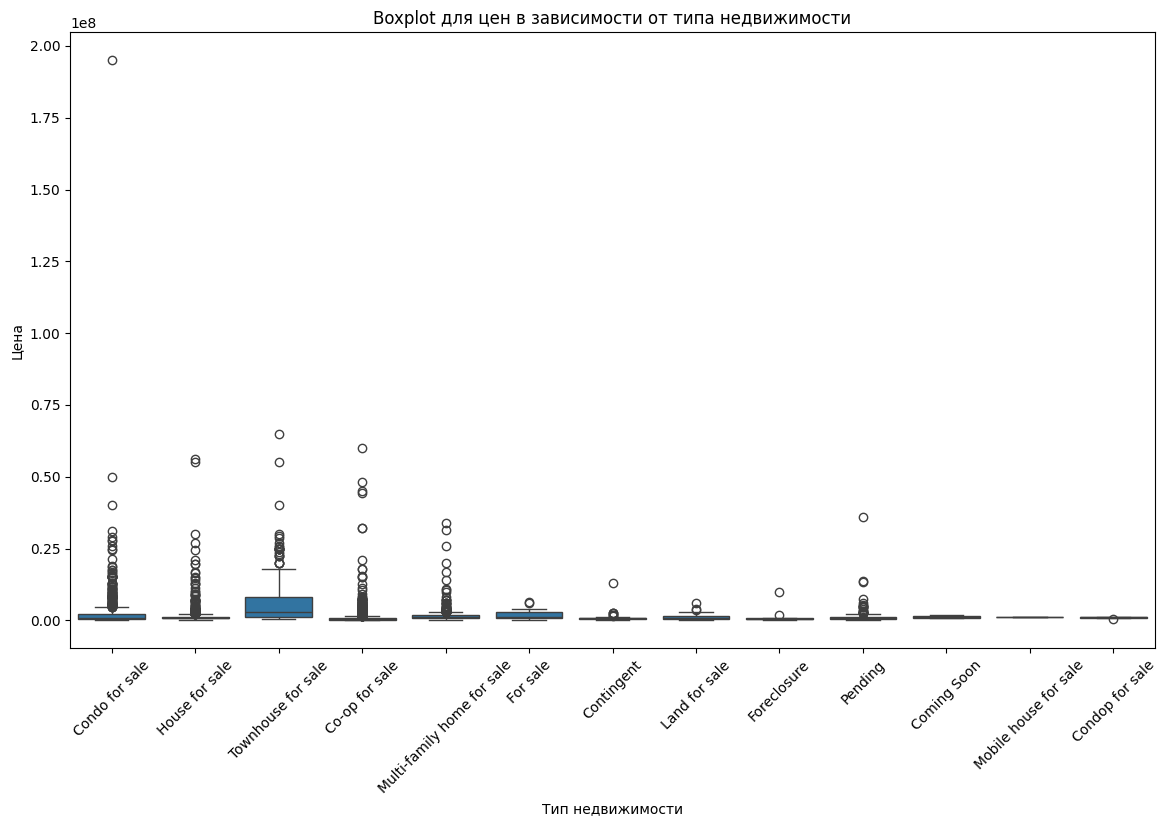

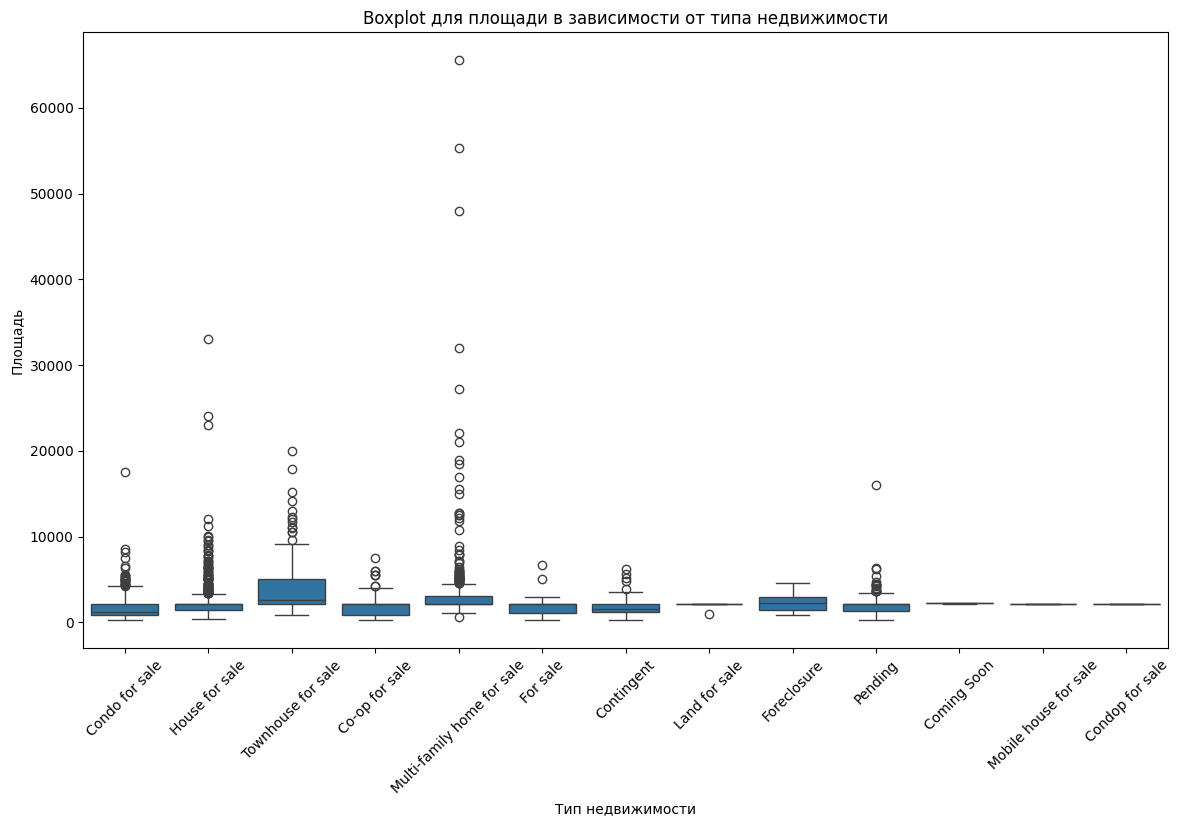

In [59]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='TYPE', y='PRICE', data=df, showfliers=True)
plt.title('Boxplot для цен в зависимости от типа недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='TYPE', y='PROPERTYSQFT', data=df, showfliers=True)
plt.title('Boxplot для площади в зависимости от типа недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Площадь')
plt.xticks(rotation=45)
plt.show()


Выбросы действительно отчетливо видны!

## Задание 2.2 Удаление выбросов

Удалите выбросы в датасете по переменной PRICE, которые были обнаружены в задании 2.1.

После удаления выведите bar plot, который будет визуализировать среднюю стоимость недвижимости в зависимости от типа недвижимости.

Возьмем по отсечке уса позиции таунхаусов 2 000 000, как точку выброса по цене, мы ее видим визуально на графике где цена по y

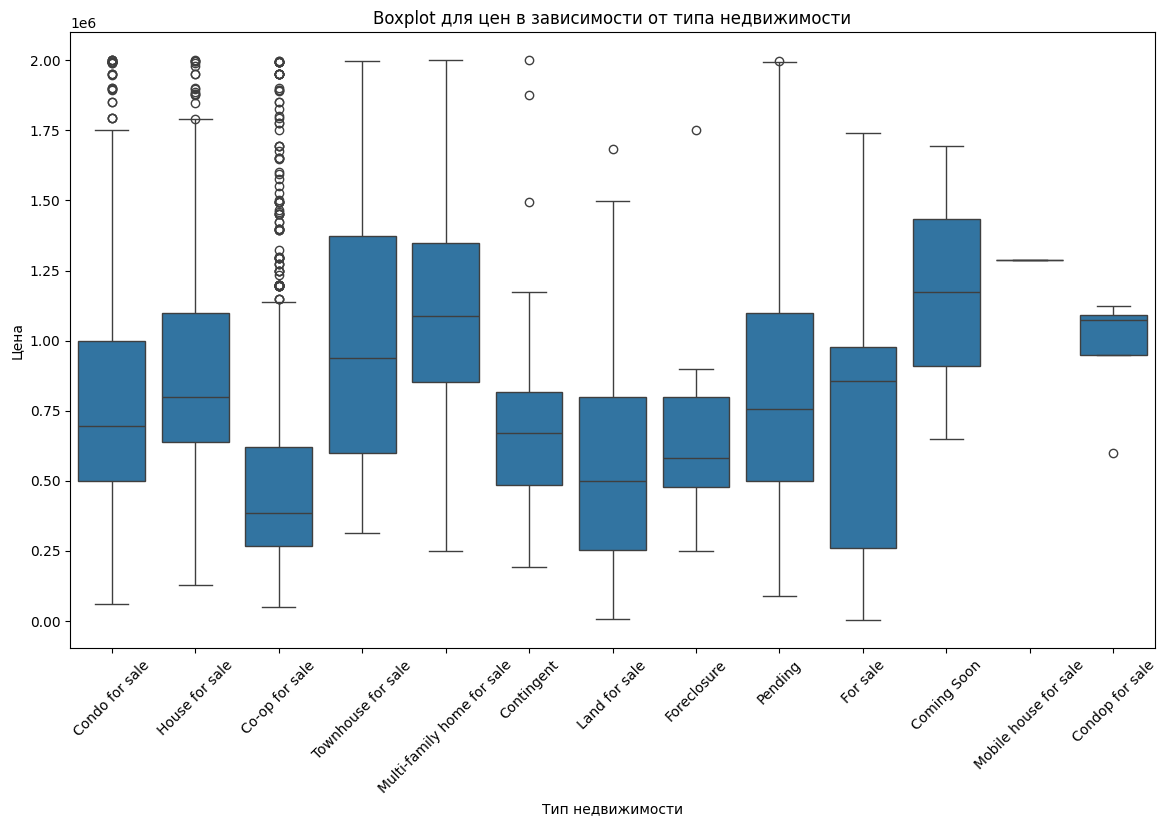

In [60]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='TYPE', y='PRICE', data=df[df['PRICE'] < 2000000], showfliers=True)
plt.title('Boxplot для цен в зависимости от типа недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

Да у нас появились так сказать "Новые" выбросы, но в целом картинка поменялсь и выглядит интересно, мы можем сранвивать медианы квантили и смотреть на количество "Новых выбросов"

## Задание 2.3 Поиск выбросов с помощью правила трёх сигм

С помощью правила трех сигм найдите, какие значения являются экстремальными (выбросами) в столбце PROPERTYSQFT. Результат выведите в текстовом виде и сравните с результатом, полученным с помощью box plot в задании 2.1.

In [61]:
mean_property_sqft = df['PROPERTYSQFT'].mean()
std_property_sqft = df['PROPERTYSQFT'].std()

lower_bound = mean_property_sqft - 3 * std_property_sqft
upper_bound = mean_property_sqft + 3 * std_property_sqft

outliers = df[(df['PROPERTYSQFT'] < lower_bound) | (df['PROPERTYSQFT'] > upper_bound)]

print('всего по признаку площади обнаружено ', len(outliers), ' выбросов ')
print("Экстремальные значения (выбросы) с использованием правила трех сигм:")
print(outliers[['TYPE', 'PROPERTYSQFT']])


всего по признаку площади обнаружено  46  выбросов 
Экстремальные значения (выбросы) с использованием правила трех сигм:
                            TYPE  PROPERTYSQFT
1                 Condo for sale  17545.000000
4             Townhouse for sale  14175.000000
7                 House for sale  33000.000000
69            Townhouse for sale  15200.000000
98                House for sale  12000.000000
138               House for sale  24000.000000
177           Townhouse for sale  10582.000000
213           Townhouse for sale  11638.000000
390           Townhouse for sale   9026.000000
584           Townhouse for sale  12300.000000
602   Multi-family home for sale  11760.000000
745   Multi-family home for sale  15000.000000
803   Multi-family home for sale  48000.000000
889           Townhouse for sale  20000.000000
908   Multi-family home for sale  10720.000000
941               House for sale  11250.000000
1031              House for sale  10100.000000
1058              House for sale 

Так сравнивать не очень удобно, думаю есть способ проще и нагляднее - это визуализация и ее мы посмотрим ниже

## Задание 2.4 Выделение выбросов

Мы нашли значение, после которого все наши наблюдения можно назвать выбросами.

Подсветите их. Для этого создайте scatter plot (столбцы PROPERTYSQFT и PRICE) в котором все точки выше этого значения PROPERTYSQFT будут помечены красным цветом.

После этого удалите эти значения из датасета (сортировка по переменной PROPERTYSQFT).

Отлично, теперь можем перейти к построению простой модели.

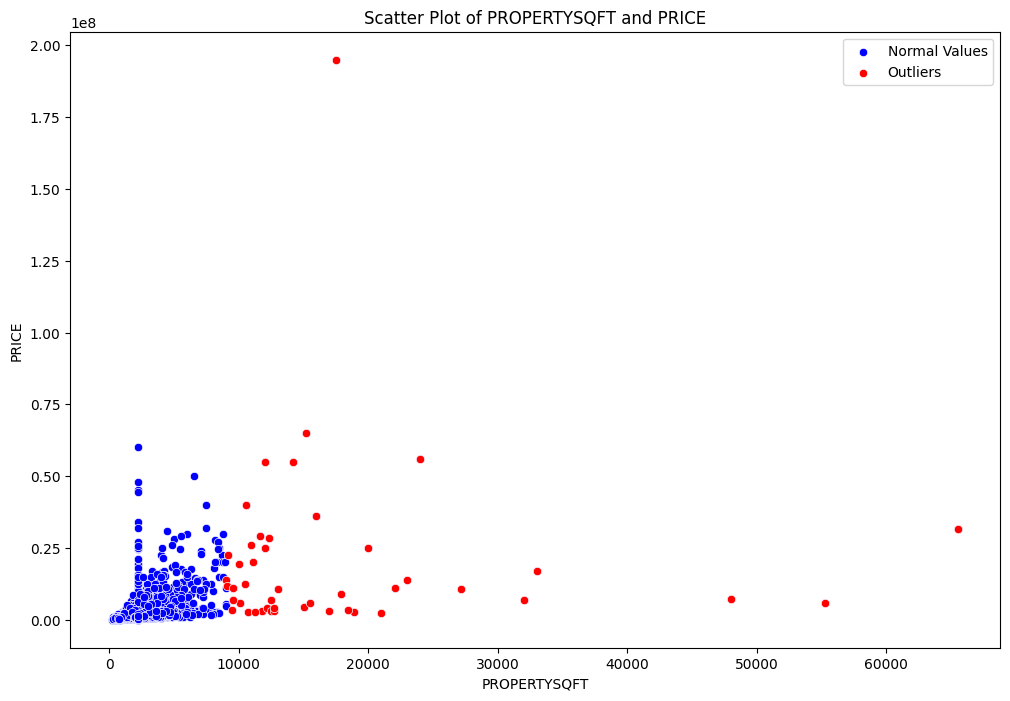

In [62]:
# Найдем значение после которого все наблюдения считаются выбросами
mean_property_sqft = df['PROPERTYSQFT'].mean()
std_property_sqft = df['PROPERTYSQFT'].std()
outlier_threshold = mean_property_sqft + 3 * std_property_sqft

# Создадим scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df, color='blue', label='Normal Values')

# Выделим выбросы красным цветом
outliers = df[df['PROPERTYSQFT'] > outlier_threshold]
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=outliers, color='red', label='Outliers')

plt.title('Scatter Plot of PROPERTYSQFT and PRICE')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.legend()
plt.show()

Очень красиво! и мы сразу видим что в выбросы попали и наши высокие значения по цене!

In [63]:
# Отберем значения, которые считаются выбросами
outliers_index = df[df['PROPERTYSQFT'] > outlier_threshold].index

# Удаление выбросов из датасета
df_filtered = df.drop(outliers_index)

# Вывод информации о датасете после удаления выбросов
print("Размер датасета до удаления выбросов:", df.shape)
print("Размер датасета после удаления выбросов:", df_filtered.shape)


Размер датасета до удаления выбросов: (4586, 19)
Размер датасета после удаления выбросов: (4540, 19)


Ниже универсальный код 

In [64]:
#numeric_columns = df.select_dtypes(include=['number']).columns
#Q1_numeric = df[numeric_columns].quantile(0.25)
#Q3_numeric = df[numeric_columns].quantile(0.75)
#IQR_numeric = Q3_numeric - Q1_numeric
#outlier_cutoff_numeric = 10 * IQR_numeric

#house_data_filtered = df[~((df[numeric_columns] < (Q1_numeric - outlier_cutoff_numeric)) | (df[numeric_columns] > (Q3_numeric + outlier_cutoff_numeric))).any(axis=1)]

Что хотелось сказать! Возможно мы зря так смело отсекаем площади, вспомним про ванные, возможно мы отсекаем большие многоквартирные дома с большим количеством ванных?

# Задание 3. Создание простой модели, визуализация результатов работы алгоритма

## Задание 3.1 Создание модели парной регрессии

В рамках других курсах вы проходили довольно много различных моделей и хорошо в них ориентируйтесь. Давайте сейчас попробуем посмотреть, в чем нам может помочь визуализация при интерпретации моделей.

Используя любую удобную для вас библиотеку, создайте модель простейшей парной регрессии. В качестве зависимой переменной используйте PRICE, в качестве независимой - PROPERTYSQFT. Полученные коэффициенты выведите и кратко опишите (логичным ли получился результат?)

In [65]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [66]:

# Выделение зависимой и независимой переменных
X = df_filtered['PROPERTYSQFT'].values.reshape(-1, 1)
y = df_filtered['PRICE'].values

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов
print("Intercept (смещение):", model.intercept_)
print("Slope (наклон):", model.coef_[0])


Intercept (смещение): -1099423.9180196985
Slope (наклон): 1399.4177484032061


Интерпретировать данные числа следует следующим образом: цена = площадь * 1399.4177484032061 - -1099423.9180196985.

Задание 3.2 Визуализация результата

Когда мы работаем с парной регрессией, нам интересно отобразить полученные результаты на графике и визуально оценить их.

Создайте scatter plot, где по оси x будет находится PROPERTYSQFT, а по оси y - PRICE. Добавьте на этот график прямую регрессионного уравнения, которая у нас получилась.

Ура! Анализ завершен. Мы проделали полный цикл работы аналитика от получения датасета до создания простейшей модели. В следующий раз мы познакомимся с более продвинутыми способами использования визуализаций в анализе. Stay tuned :)

In [67]:
from scipy.stats import linregress

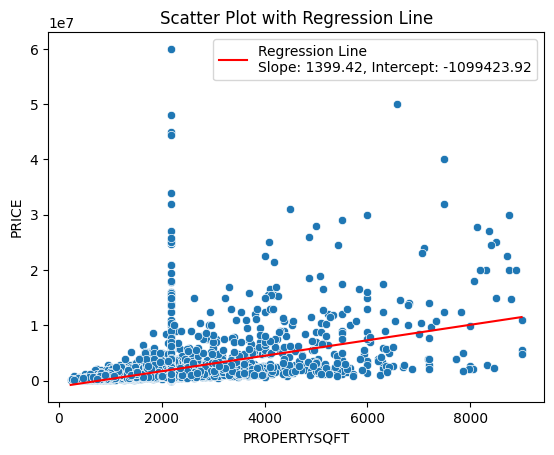

In [68]:
# Создание scatter plot
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df_filtered)

# Расчет коэффициентов линейной регрессии
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['PROPERTYSQFT'], df_filtered['PRICE'])

# Создание массива значений для прямой
x_values = np.linspace(df_filtered['PROPERTYSQFT'].min(), df_filtered['PROPERTYSQFT'].max(), 100)
y_values = slope * x_values + intercept

# Добавление прямой на график
plt.plot(x_values, y_values, color='red', label=f'Regression Line\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')

# Добавление легенды
plt.legend()

# Отображение графика
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.title('Scatter Plot with Regression Line')
plt.show()

Тренд виден, но результ так себе, наша регрессия обясняет всего лишь 30% дисперсии

И напоследок выведем матрицу корреляций уже отфильтрованного набора данных

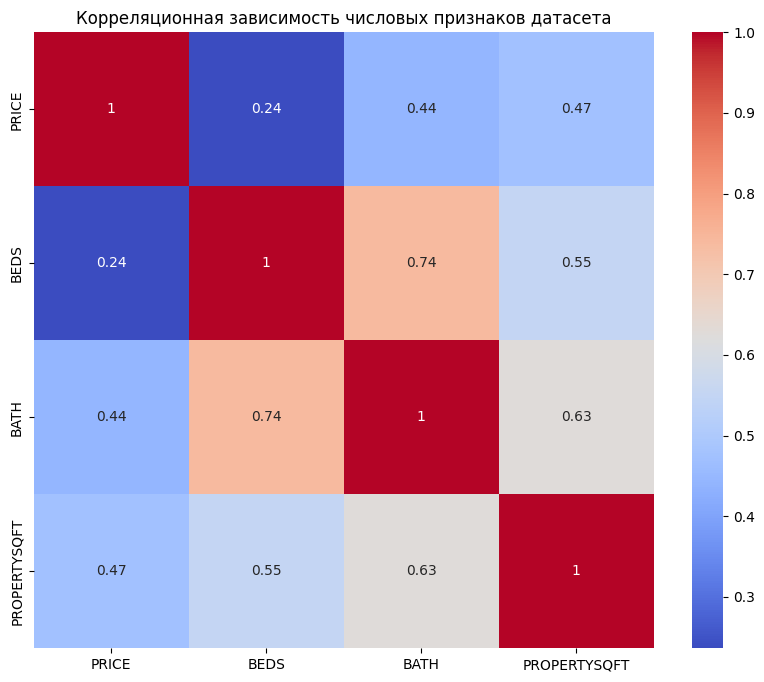

In [69]:
# У нас 4 числовых параметра, посмотрим на корреляцию между ними и попробуем сделать выводы
corr = df_filtered[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].corr()

# Use seaborn to create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная зависимость числовых признаков датасета')
plt.show()

# Bonus. Визуализация геоданных

Некоторые типы визуализаций работают с конкретными типами данных. Вы могли заметить, что в нашем датасете есть столбцы LATITUDE и LONGITUDE - широта и долгота соответственно. Благодаря этим столбцам мы можем пространственно локализовать наши данные, а значит, создать карту.

К сожалению в библиотеках matplotlib и seaborn отсутствует функционал создания карт. Однако создавать карты можно с помощью других библиотек. Одна из наиболее популярных - библиотека folium. Именно ей мы и воспользуемся.

Давайте для начала скачаем folium.

Теперь мы можем начинать. В библиотеке folium есть отдельный тип данных folium.map, который позволяет создавать карту. В ходе создания нужно задать два параметра: location - ширина и долгота стартового расположения карты, а также zoom_start - стартовое приближение.

In [70]:
import folium

In [71]:

my_map = folium.Map(location=[40.7, -73.9], zoom_start=10)

Чтобы добавить точки на карту, необходимо воспользоваться следующими функциями:

folium.Marker для создания объекта точки на карте.
folium.add_to для добавления объекта на карту.
Давайте создадим список парных списков, в каждом из которых будет хранится ширина и долгота объекта. Выберем только 500 первых наблюдений в датасете, чтобы не перегружать систему. В качестве описания наших точек (параметр popup) будем использовать цену. А направляя курсор на точку будем отобращать адрес (параметр tooltip).

Давайте создадим эту карту:

In [72]:
# Создание карты
my_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Получение координат и цен для первых 500 записей
points = ny_housing[['LATITUDE', 'LONGITUDE']].values.tolist()[:500]

# Добавление маркеров на карту
for _, row in ny_housing.head(500).iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=str(row['PRICE']), tooltip=row['MAIN_ADDRESS']).add_to(my_map)

# Отображение карты
my_map

Отлично!

Мы видим, что карта успешно создалась. Используя полученную визуализацию мы уже можем сделать несколько выводов:

Покликав на разные варианты оказалось, что средняя цена в Манхеттене сильно выше, чем в Бронксе (кто бы мог подумать!)
Данные, которые у нас есть относятся только к городу Нью-Йорк, а не к штату. Поскольку все перечисленные точки относятся к одному из пяти [боро] города Нью-Йорк.
Аппартаменты, продающиеся в городе распределены равномерно, судя по всему, спросом пользуются квартиры всех районов города.
Таким образом, просто создав карту недвижимости мы можем получить большое количество информации о нашем датасете. Это может помочь Вам в дальнейшей работе. Удачи!

Геоданные это очень круто в итоге я нагуглил еше несколько вариантов использования:

In [73]:

# тепловая карта по цене
# Create a density mapbox to represent the property prices geographically
fig_geo = px.density_mapbox(
    df, 
    lat='LATITUDE', 
    lon='LONGITUDE', 
    z='PRICE', 
    radius=10, 
    center=dict(lat=df['LATITUDE'].mean(), lon=df['LONGITUDE'].mean()), 
    zoom=10,
    mapbox_style="open-street-map",  # Using the Open Street Map style
    color_continuous_scale=px.colors.sequential.Plasma,  # A visually appealing color scale
    title='Geographical Distribution of Property Prices'
)

# Update layout for a better visual design
fig_geo.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    paper_bgcolor='rgba(10, 10, 10, 1)',  # Set a dark background for the paper
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="white"
    )
)

# Display the updated plot
fig_geo.show()

In [74]:
# тепловая карта по цене объекта
fig = px.scatter_mapbox(df, 
                        lat='LATITUDE', 
                        lon='LONGITUDE', 
                        color='PRICE', 
                        size='PRICE',
                        color_continuous_scale='viridis',
                        size_max=18,
                        zoom=10)

color_scale = px.colors.sequential.Viridis  # Choose the desired color scale
color_range = [min(df['PRICE']), max(df['PRICE'])]  # Set the range based on your data
fig.update_traces(marker=dict(colorbar=dict(tickvals=color_range)))
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title='Objects on Map - Plotly Express')

In [75]:
# Самые дорогие дома
df_sorted = df.sort_values(by='PRICE')

my_map_expensive_houses = folium.Map(location=[df_sorted['LATITUDE'].mean(), df_sorted['LONGITUDE'].mean()], zoom_start=11)

for index, row in df_sorted.head(100).iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"{row['STREET_NAME']}\nЦена: {row['PRICE']}",
        icon=folium.Icon(color='green', icon='home')
    ).add_to(my_map_expensive_houses)

my_map_expensive_houses

In [76]:
# самые дешевые объекты
df_sorted = df.sort_values(by='PRICE')

my_map_cheap_houses = folium.Map(location=[df_sorted['LATITUDE'].mean(), df_sorted['LONGITUDE'].mean()], zoom_start=11)

for index, row in df_sorted.tail(100).iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"{row['STREET_NAME']}\nЦена: {row['PRICE']}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(my_map_cheap_houses)

my_map_cheap_houses